## import stuff 

In [10]:
# Import some necessary modules
import os
import sys
import pickle
import logging
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from chainconsumer import ChainConsumer     

sys.path.append("../../Barry/")     # Change this so that it points to where you have Barry installed

#from barry.samplers import DynestySampler
from barry.samplers import NautilusSampler
from barry.config import setup
from barry.models import PowerBeutler2017, CorrBeutler2017
from barry.datasets.dataset_power_spectrum import PowerSpectrum_DESI_KP4
from barry.datasets.dataset_correlation_function import CorrelationFunction_DESI_KP4
from barry.fitter import Fitter
from barry.models.model import Correction # class for applying corrections to the likelihood function 
from barry.utils import weighted_avg_and_cov # function for getting avg and covariance 


CV = True 

pfn1 = "/global/u1/a/abbew25/barryrepo/Barry/cosmodesi_KP4ELG_examplecode_make_picklefiles/plots/desi_kp4_abacus_cubic_ELG-broadbandpoly2/output/desi_kp4_abacus_cubic_ELG-broadbandpoly2.fitter.pkl"

pfn2 = "/global/u1/a/abbew25/barryrepo/Barry/cosmodesi_KP4ELG_examplecode_make_picklefiles/plots/desi_kp4_abacus_cubic_ELG_phaseshiftfree-polybroadband2/output/desi_kp4_abacus_cubic_ELG_phaseshiftfree-polybroadband2.fitter.pkl"
    
pfns = [
        pfn1, 
        pfn2
]



## looping through and saving the chains 

In [13]:
c = ChainConsumer() 

for i,p in enumerate(pfns): 
    with open(p, 'rb') as pickle_file:
        fitter = pickle.load(pickle_file)

    for posterior, weight, chain, evidence, model, data, extra in fitter.load():
        
        
        if 'mean' not in extra['name']:  # making sure we only get chain for mock mean 
            continue 
            
        if 'Prerecon' in extra['name']:
            continue 
            
        if 'Pk' not in extra['name']:
            continue 
#         CVfile = '' # making sure we adjust this parameter if CV or not and skipping depending on value of CV 
#         if CV:
#             CVfile = 'CV'
#             if "CV" not in extra["name"] or "Pk" not in extra["name"]:
#                continue
#         else:
#             if "CV" in extra['name']:
#                 continue 
#             if "Pk" not in extra['name']:
#                 continue 
                
                
        df = pd.DataFrame(chain, columns=model.get_labels())
    
        # Compute alpha_par and alpha_perp for each point in the chain
        alpha_par, alpha_perp = model.get_alphas(df["$\\alpha$"].to_numpy(), df["$\\epsilon$"].to_numpy())
        df["$\\alpha_\\parallel$"] = alpha_par
        df["$\\alpha_\\perp$"] = alpha_perp
        
        extraname = ''
        if i == 1:
            extraname = ' beta model'
        # Add the chain or MAP to the Chainconsumer plots
        #print(extra)
        extra.pop("realisation", 'mean')#+ extraname)
        extra["name"] = extra['name'] + extraname
        
        #print(extra)

        c.add_chain(df, weights=weight, **extra, plot_contour=True, plot_point=False, show_as_1d_prior=False)
        #print('test')
        

INFO:barry:Loading chains
INFO:barry:Loaded 208 chains
INFO:barry:Loading chains
INFO:barry:Loaded 208 chains


['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__version__', '__weakref__', '_all_colours', '_all_names', '_all_parameters', '_cmaps', '_configured', '_configured_truth', '_default_parameters', '_gauss_mode', '_get_chain', '_get_chain_name', '_init_params', '_linestyles', '_logger', '_num_configure_calls', 'add_chain', 'add_covariance', 'add_marker', 'analysis', 'chains', 'color_finder', 'comparison', 'comparison_aic', 'comparison_bic', 'comparison_dic', 'comparison_table', 'config', 'config_truth', 'configure', 'configure_truth', 'diagnostic', 'diagnostic_gelman_rubin', 'diagnostic_geweke', 'divide_chain', 'get_correlation_table', 'get_correlations', 'get_covariance', 'get_covariance_table'

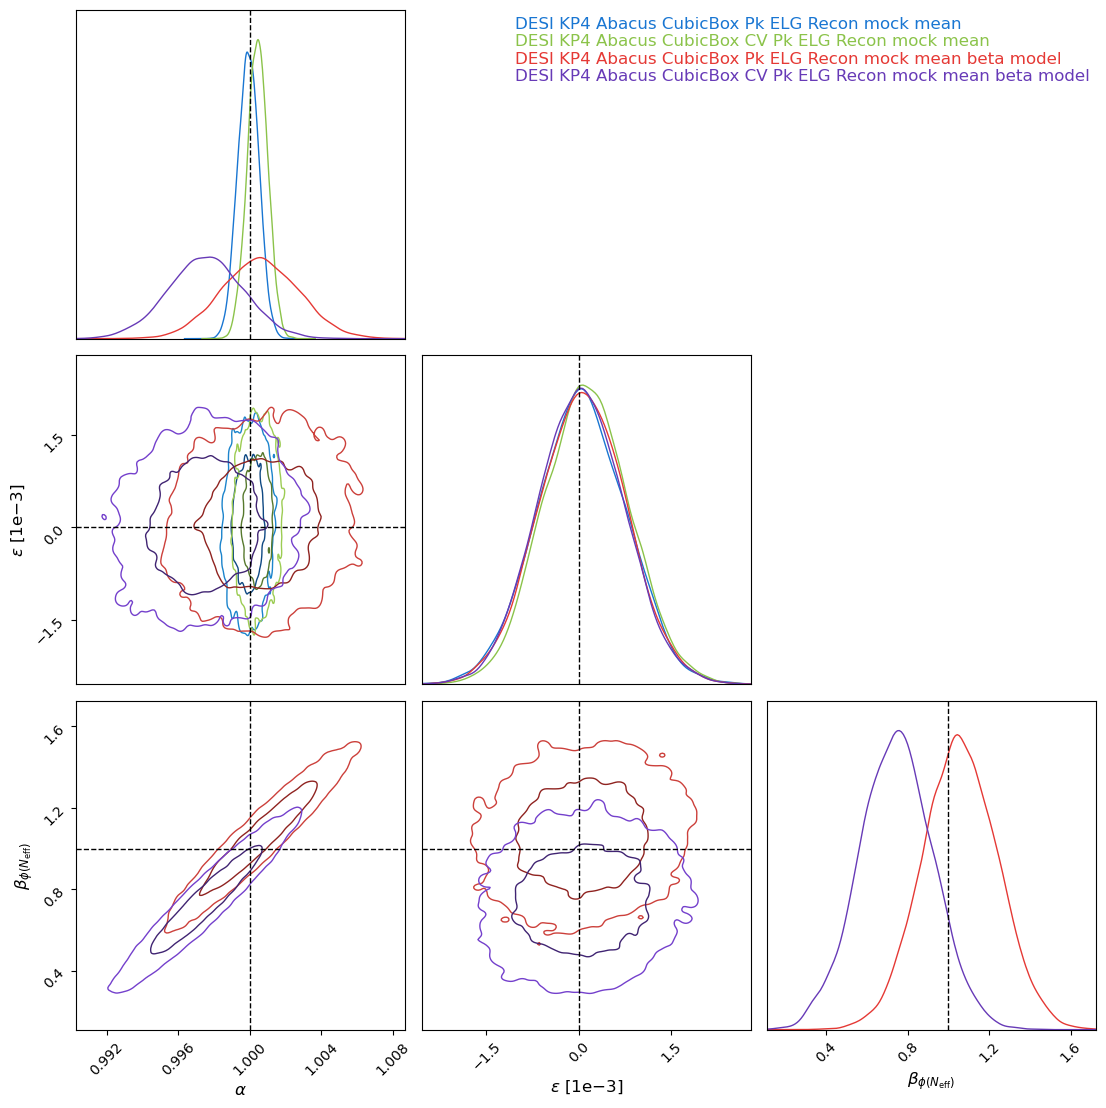

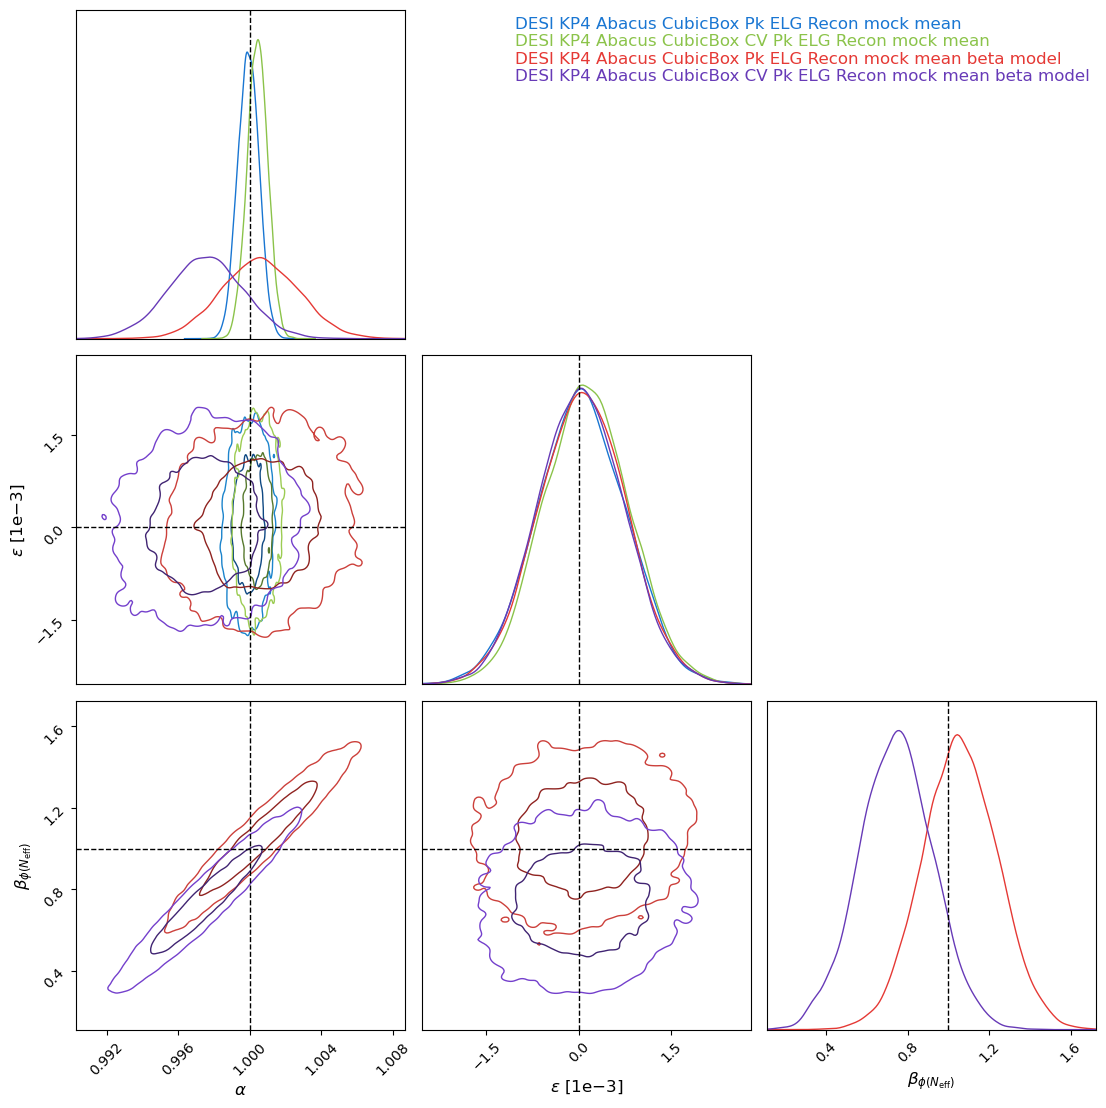

In [14]:
truth = {"$\\alpha$": 1.0, "$\\epsilon$": 0, "$\\alpha_\\perp$": 1.0, "$\\alpha_\\parallel$": 1.0}
#truth = {"$\\alpha_\\parallel$": 1.0, "$\\alpha_\\perp$": 1.0, "$\\alpha_\\perp$": 1.0, "$\\alpha_\\parallel$": 1.0}


truth["$\\beta_{\\phi(N_{\\mathrm{eff}})}$"] = 1.0

parameters = [names for names in truth]
parameters.append("$\\Sigma_{nl,||}$")
parameters.append("$\\Sigma_{nl,\\perp}$")
parameters.append("$\\Sigma_s$")

print(dir(c))

c.plotter.plot(
    truth=truth,
        parameters = parameters[:2] + [parameters[4]],
        legend=True,
        display=False,
        figsize=(12,12), 
    )

## import stuff (now plotting with varying Omega_m, Neff) 

In [7]:
# Import some necessary modules
import os
import sys
import pickle
import logging
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from chainconsumer import ChainConsumer     

sys.path.append("../../Barry/")     # Change this so that it points to where you have Barry installed

#from barry.samplers import DynestySampler
from barry.samplers import NautilusSampler
from barry.config import setup
from barry.models import PowerBeutler2017, CorrBeutler2017
from barry.datasets.dataset_power_spectrum import PowerSpectrum_DESI_KP4
from barry.datasets.dataset_correlation_function import CorrelationFunction_DESI_KP4
from barry.fitter import Fitter
from barry.models.model import Correction # class for applying corrections to the likelihood function 
from barry.utils import weighted_avg_and_cov # function for getting avg and covariance 


CV = True 

pfn1 = "/global/u1/a/abbew25/barryrepo/Barry/cosmodesi_KP4ELG_examplecode_make_picklefiles/plots/desi_kp4_abacus_cubic_ELG_omfree/output/desi_kp4_abacus_cubic_ELG_omfree.fitter.pkl"

pfn2 = "/global/u1/a/abbew25/barryrepo/Barry/cosmodesi_KP4ELG_examplecode_make_picklefiles/plots/desi_kp4_abacus_cubic_ELG_nefffree/output/desi_kp4_abacus_cubic_ELG_nefffree.fitter.pkl"
    
pfns = [
        pfn1, 
        pfn2
]


## do the loops 

In [8]:
c = ChainConsumer() 

for i,p in enumerate(pfns): 
    with open(p, 'rb') as pickle_file:
        fitter = pickle.load(pickle_file)

    for posterior, weight, chain, evidence, model, data, extra in fitter.load():
        
        
        if 'mean' not in extra['name']:  # making sure we only get chain for mock mean 
            continue 
            
        if 'Prerecon' in extra['name']:
            continue 
            
        # if 'Pk' not in extra['name']:
        #     continue 
#         CVfile = '' # making sure we adjust this parameter if CV or not and skipping depending on value of CV 
#         if CV:
#             CVfile = 'CV'
#             if "CV" not in extra["name"] or "Pk" not in extra["name"]:
#                continue
#         else:
#             if "CV" in extra['name']:
#                 continue 
#             if "Pk" not in extra['name']:
#                 continue 
                
                
        df = pd.DataFrame(chain, columns=model.get_labels())
    
        # Compute alpha_par and alpha_perp for each point in the chain
        alpha_par, alpha_perp = model.get_alphas(df["$\\alpha$"].to_numpy(), df["$\\epsilon$"].to_numpy())
        df["$\\alpha_\\parallel$"] = alpha_par
        df["$\\alpha_\\perp$"] = alpha_perp
        
        extraname = ''
        if i == 0:
            extraname = ' om model'
        if i == 1: 
            extraname = ' neff model'
            
        # Add the chain or MAP to the Chainconsumer plots
        #print(extra)
        extra.pop("realisation", 'mean')#+ extraname)
        extra["name"] = extra['name'] + extraname
        
        #print(extra)
        #print(df)

        c.add_chain(df, weights=weight, **extra, plot_contour=True, plot_point=False, show_as_1d_prior=False)
        #print('test')
        

INFO:barry:Loading chains
INFO:barry:Loaded 208 chains
INFO:barry:Loading chains
INFO:barry:Loaded 208 chains


In [9]:
c = ChainConsumer() 

for i,p in enumerate(pfns): 
    with open(p, 'rb') as pickle_file:
        fitter = pickle.load(pickle_file)

    for posterior, weight, chain, evidence, model, data, extra in fitter.load():
        
        
        if 'mean' not in extra['name']:  # making sure we only get chain for mock mean 
            continue 
            
        if 'Prerecon' in extra['name']:
            continue 
            
        # if 'Pk' not in extra['name']:
        #     continue 
#         CVfile = '' # making sure we adjust this parameter if CV or not and skipping depending on value of CV 
#         if CV:
#             CVfile = 'CV'
#             if "CV" not in extra["name"] or "Pk" not in extra["name"]:
#                continue
#         else:
#             if "CV" in extra['name']:
#                 continue 
#             if "Pk" not in extra['name']:
#                 continue 
                
                
        df = pd.DataFrame(chain, columns=model.get_labels())
    
        # Compute alpha_par and alpha_perp for each point in the chain
        alpha_par, alpha_perp = model.get_alphas(df["$\\alpha$"].to_numpy(), df["$\\epsilon$"].to_numpy())
        df["$\\alpha_\\parallel$"] = alpha_par
        df["$\\alpha_\\perp$"] = alpha_perp
        
        extraname = ''
        if i == 0:
            extraname = ' om model'
        if i == 1: 
            extraname = ' neff model'
            
        # Add the chain or MAP to the Chainconsumer plots
        #print(extra)
        extra.pop("realisation", 'mean')#+ extraname)
        extra["name"] = extra['name'] + extraname
        
        #print(extra)
        #print(df)

        c.add_chain(df, weights=weight, **extra, plot_contour=True, plot_point=False, show_as_1d_prior=False)
        #print('test')
        

INFO:barry:Loading chains
INFO:barry:Loaded 208 chains
INFO:barry:Loading chains
INFO:barry:Loaded 208 chains


['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__version__', '__weakref__', '_all_colours', '_all_names', '_all_parameters', '_cmaps', '_configured', '_configured_truth', '_default_parameters', '_gauss_mode', '_get_chain', '_get_chain_name', '_init_params', '_linestyles', '_logger', '_num_configure_calls', 'add_chain', 'add_covariance', 'add_marker', 'analysis', 'chains', 'color_finder', 'comparison', 'comparison_aic', 'comparison_bic', 'comparison_dic', 'comparison_table', 'config', 'config_truth', 'configure', 'configure_truth', 'diagnostic', 'diagnostic_gelman_rubin', 'diagnostic_geweke', 'divide_chain', 'get_correlation_table', 'get_correlations', 'get_covariance', 'get_covariance_table'

INFO:matplotlib.mathtext:Substituting symbol \perp from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol \perp from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol \perp from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol \perp from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol \perp from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol \perp from STIXGeneral


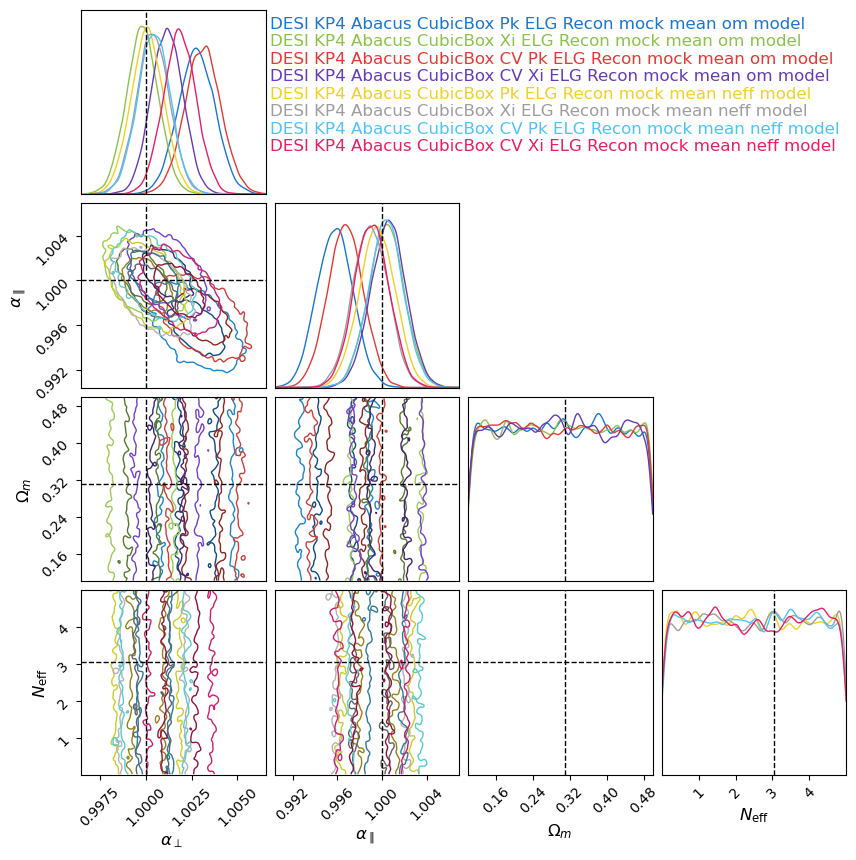

INFO:matplotlib.mathtext:Substituting symbol \perp from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol \perp from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol \perp from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol \perp from STIXGeneral


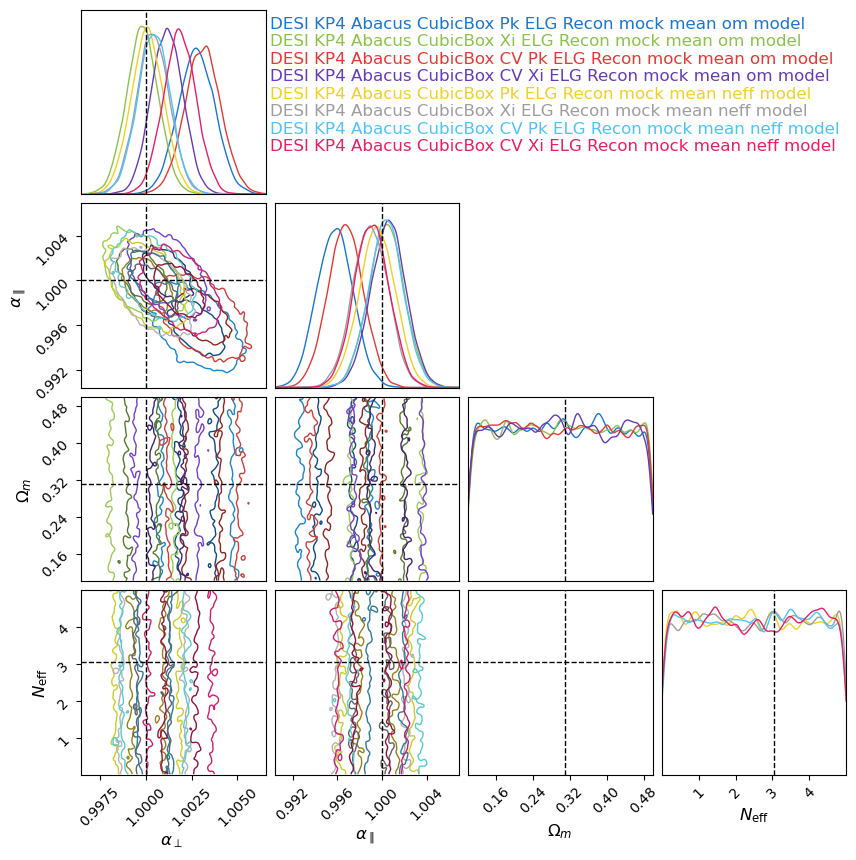

In [7]:
truth = {"$\\alpha$": 1.0, "$\\epsilon$": 0, "$\\alpha_\\perp$": 1.0, "$\\alpha_\\parallel$": 1.0}

truth["$\\Omega_m$"] = 0.31
truth["$N_{\\mathrm{eff}}$"] = 3.044

parameters = [names for names in truth]
# parameters.append("$\\Sigma_{nl,||}$")
# parameters.append("$\\Sigma_{nl,\\perp}$")
# parameters.append("$\\Sigma_s$")

print(dir(c))

c.plotter.plot(
    truth=truth,
        parameters = parameters[:2]+parameters[4:],
        legend=True,
        display=False,
        figsize=(9,9), 
    )

## attempt 3 - best nuisance parameters 

In [4]:
# Import some necessary modules
import os
import sys
import pickle
import logging
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from chainconsumer import ChainConsumer     

sys.path.append("../../Barry/")     # Change this so that it points to where you have Barry installed

#from barry.samplers import DynestySampler
from barry.samplers import NautilusSampler
from barry.config import setup
from barry.models import PowerBeutler2017, CorrBeutler2017
from barry.datasets.dataset_power_spectrum import PowerSpectrum_DESI_KP4
from barry.datasets.dataset_correlation_function import CorrelationFunction_DESI_KP4
from barry.fitter import Fitter
from barry.models.model import Correction # class for applying corrections to the likelihood function 
from barry.utils import weighted_avg_and_cov # function for getting avg and covariance 

pfn1 = "/global/u1/a/abbew25/barryrepo/Barry/cosmodesi_KP4ELG_examplecode_make_picklefiles/plots/desi_kp4_abacus_cubic_ELG_bestnuisance/output/desi_kp4_abacus_cubic_ELG_bestnuisance.fitter.pkl"
 
pfns = [
        pfn1, 
]


In [6]:
c = ChainConsumer() 

for i,p in enumerate(pfns): 
    with open(p, 'rb') as pickle_file:
        fitter = pickle.load(pickle_file)

    for posterior, weight, chain, evidence, model, data, extra in fitter.load():
        
        
        if 'mean' not in extra['name']:  # making sure we only get chain for mock mean 
            continue 
            
        if 'Prerecon' in extra['name']:
            continue 
            
        # if 'Pk' not in extra['name']:
        #     continue 
#         CVfile = '' # making sure we adjust this parameter if CV or not and skipping depending on value of CV 
#         if CV:
#             CVfile = 'CV'
#             if "CV" not in extra["name"] or "Pk" not in extra["name"]:
#                continue
#         else:
#             if "CV" in extra['name']:
#                 continue 
#             if "Pk" not in extra['name']:
#                 continue 
                
                
        df = pd.DataFrame(chain, columns=model.get_labels())
    
        # Add the chain or MAP to the Chainconsumer plots
        #print(extra)
        extra.pop("realisation", 'mean')#+ extraname)
        #extra["name"] = extra['name'] + extraname
        
        #print(extra)
        #print(df)

        c.add_chain(df, weights=weight, **extra, plot_contour=True, plot_point=False, show_as_1d_prior=False)
        #print('test')

INFO:barry:Loading chains
INFO:barry:Loaded 206 chains


['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__version__', '__weakref__', '_all_colours', '_all_names', '_all_parameters', '_cmaps', '_configured', '_configured_truth', '_default_parameters', '_gauss_mode', '_get_chain', '_get_chain_name', '_init_params', '_linestyles', '_logger', '_num_configure_calls', 'add_chain', 'add_covariance', 'add_marker', 'analysis', 'chains', 'color_finder', 'comparison', 'comparison_aic', 'comparison_bic', 'comparison_dic', 'comparison_table', 'config', 'config_truth', 'configure', 'configure_truth', 'diagnostic', 'diagnostic_gelman_rubin', 'diagnostic_geweke', 'divide_chain', 'get_correlation_table', 'get_correlations', 'get_covariance', 'get_covariance_table'

INFO:matplotlib.mathtext:Substituting symbol \perp from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol \perp from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol \perp from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol \perp from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol \perp from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol \perp from STIXGeneral


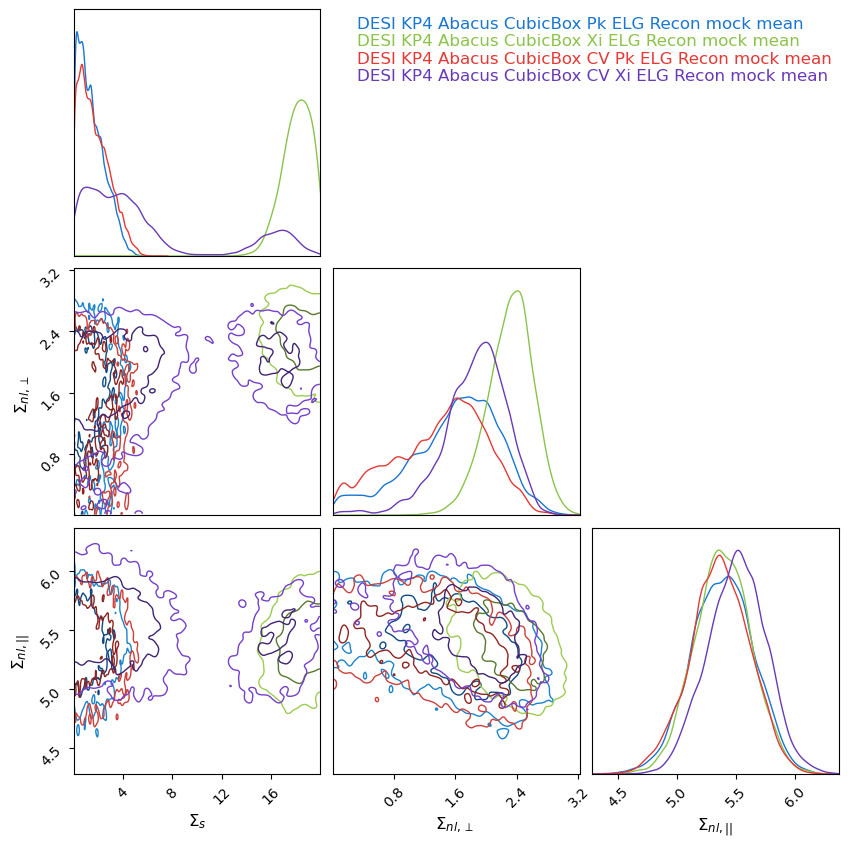

INFO:matplotlib.mathtext:Substituting symbol \perp from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol \perp from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol \perp from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol \perp from STIXGeneral


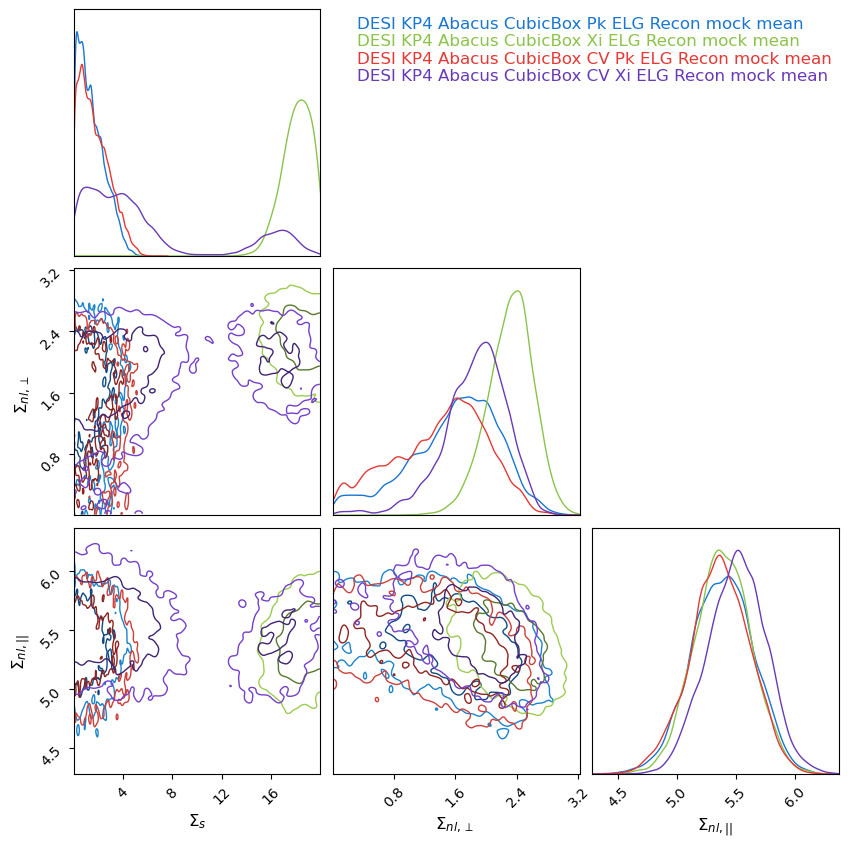

In [11]:
#truth = {"$\\alpha$": 1.0, "$\\epsilon$": 0, "$\\alpha_\\perp$": 1.0, "$\\alpha_\\parallel$": 1.0}

#truth["$\\Omega_m$"] = 0.31
#truth["$N_{\\mathrm{eff}}$"] = 3.044

#parameters = [names for names in truth]
# parameters.append("$\\Sigma_{nl,||}$")
# parameters.append("$\\Sigma_{nl,\\perp}$")
# parameters.append("$\\Sigma_s$")

print(dir(c))

c.plotter.plot(
    #truth=truth,
        parameters = ["$\\Sigma_s$", "$\\Sigma_{nl,\\perp}$", "$\Sigma_{nl,||}$"],
        legend=True,
        display=False,
        figsize=(9,9), 
    )

## now looking at fits to 6 c003 cubic mocks with c000 clustering power spectrum measurements (template is c000)

INFO:barry:Loading chains
INFO:barry:Loaded 14 chains
INFO:barry:Loading chains
INFO:barry:Loaded 14 chains


       $\alpha$  $\epsilon$  $\Sigma_s$   $\beta$  $\Sigma_{nl,||}$  \
0      0.995521    0.001942    1.485220  0.397956          3.567511   
1      0.996846    0.009639    1.015219  0.762446          4.902105   
2      0.990396   -0.000872    1.073912  0.532114          6.230177   
3      0.996898   -0.001445    3.965203  0.820821          4.795040   
4      0.996530    0.010938    0.421771  0.637243          4.060107   
...         ...         ...         ...       ...               ...   
11220  0.989850    0.004267    0.053605  0.662752          4.653357   
11221  0.989671    0.003987    0.395361  0.649747          4.712554   
11222  0.990679    0.004972    0.070539  0.602754          4.282358   
11223  0.989811    0.004090    0.748391  0.611974          4.374168   
11224  0.989838    0.003639    0.666573  0.644657          4.262933   

       $\Sigma_{nl,\perp}$  
0                 4.658434  
1                 2.827840  
2                 1.887813  
3                 0.768637  
4 

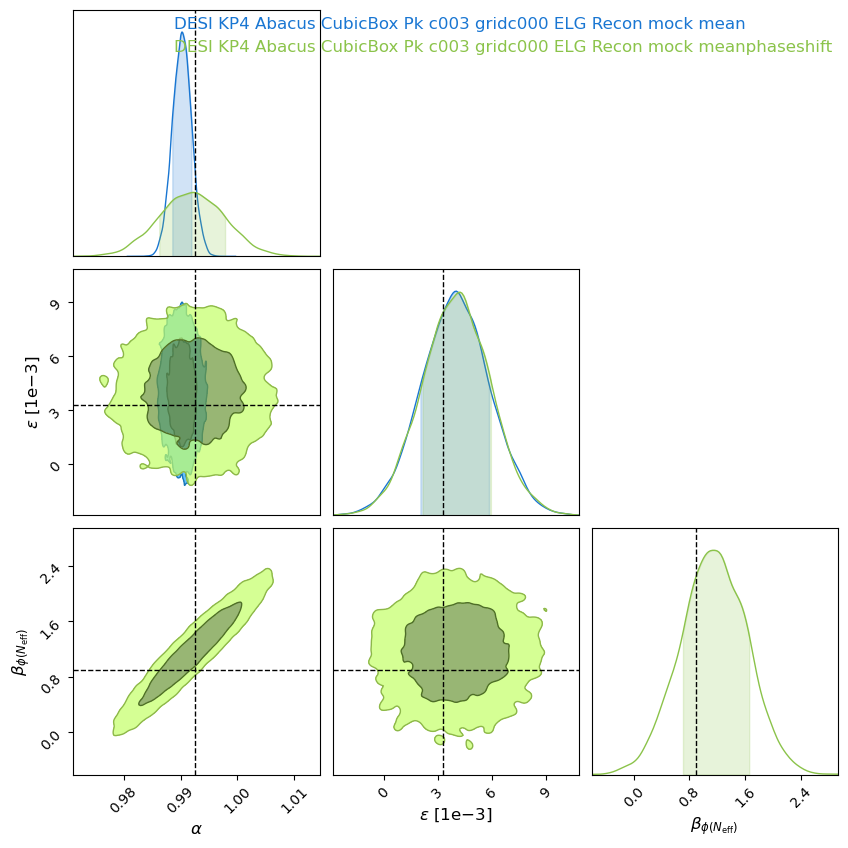

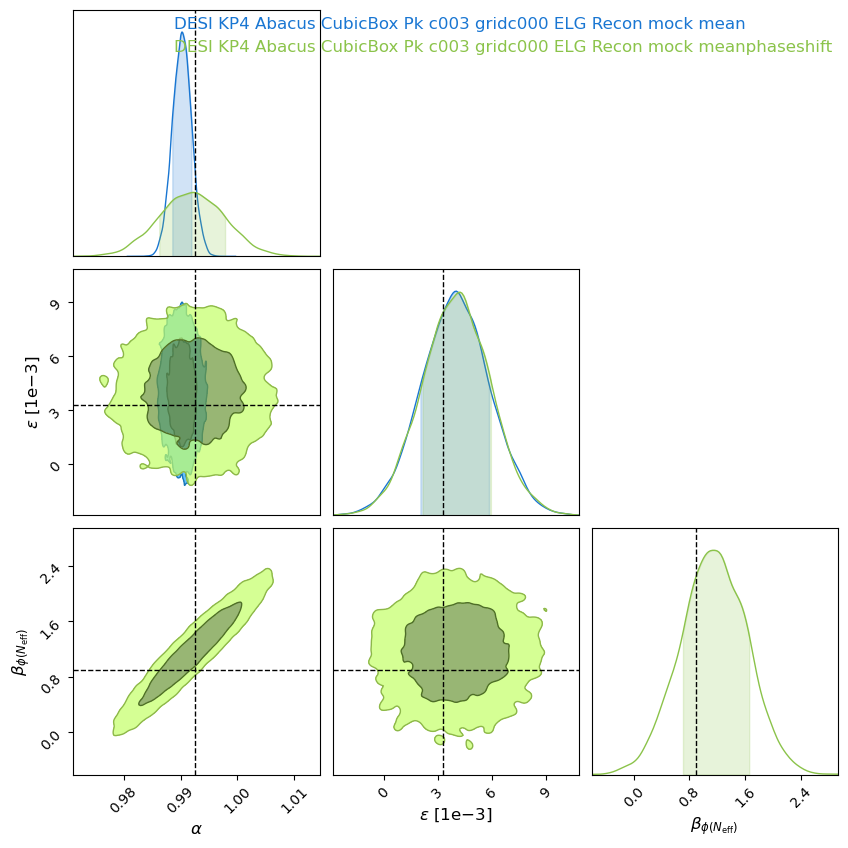

In [10]:
# Import some necessary modules
import os
import sys
import pickle
import logging
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from chainconsumer import ChainConsumer     

sys.path.append("../../Barry/")     # Change this so that it points to where you have Barry installed

#from barry.samplers import DynestySampler
from barry.samplers import NautilusSampler
from barry.config import setup
from barry.models import PowerBeutler2017, CorrBeutler2017
from barry.datasets.dataset_power_spectrum import PowerSpectrum_DESI_KP4
from barry.datasets.dataset_correlation_function import CorrelationFunction_DESI_KP4
from barry.fitter import Fitter
from barry.models.model import Correction # class for applying corrections to the likelihood function 
from barry.utils import weighted_avg_and_cov # function for getting avg and covariance 

pfn1 = "/global/u1/a/abbew25/barryrepo/Barry/cosmodesi_KP4ELG_examplecode_make_picklefiles/plots/desi_kp4_abacus_cubic_ELG-c003/output/desi_kp4_abacus_cubic_ELG-c003.fitter.pkl"

pfn2 = "/global/u1/a/abbew25/barryrepo/Barry/cosmodesi_KP4ELG_examplecode_make_picklefiles/plots/desi_kp4_abacus_cubic_ELG_phaseshiftfree-c003/output/desi_kp4_abacus_cubic_ELG_phaseshiftfree-c003.fitter.pkl"
    
pfns = [
        pfn1, 
        pfn2
]


c = ChainConsumer() 

for i,p in enumerate(pfns): 
    with open(p, 'rb') as pickle_file:
        fitter = pickle.load(pickle_file)

    for posterior, weight, chain, evidence, model, data, extra in fitter.load():
        
        
        if 'mean' not in extra['name']:  # making sure we only get chain for mock mean 
            continue 
            
        if 'Prerecon' in extra['name']: # making sure we only get results from recon 
            continue  
                
        df = pd.DataFrame(chain, columns=model.get_labels())
        
        print(df)
    
        # Compute alpha_par and alpha_perp for each point in the chain
        alpha_par, alpha_perp = model.get_alphas(df["$\\alpha$"].to_numpy(), df["$\\epsilon$"].to_numpy())
        df["$\\alpha_\\parallel$"] = alpha_par
        df["$\\alpha_\\perp$"] = alpha_perp
        
        # Add the chain or MAP to the Chainconsumer plots
        #print(extra)
        extraname = ''
        if i == 1:
            extraname = 'phaseshift'
            
        extra.pop("realisation", 'mean' + extraname)
        extra["name"] = extra['name'] + extraname
        
        #print(extra)
        #print(df)

        c.add_chain(df, weights=weight, **extra, plot_contour=True, plot_point=False, show_as_1d_prior=False)
        #print('test')
    
couplingterm = 1.0/0.22710731766023898
beta_approx = (3.044/(3.044+couplingterm) * (3.7+couplingterm)/3.7) 

alpha, eps = model.get_reverse_alphas(0.99906947, 0.98927880) 

truth = {"$\\alpha$": alpha, "$\\epsilon$": eps, "$\\alpha_\\parallel$": 0.99906947, "$\\alpha_\\perp$": 0.98927880, 
         "$\\beta_{\\phi(N_{\\mathrm{eff}})}$": beta_approx}

parameters = [names for names in truth]

c.plotter.plot(
    truth=truth,
        parameters = parameters[:2]+parameters[4:], 
        legend=True,
        display=False,
        figsize=(9,9), 
)

## now looking at fits to 6 c003 cubic mocks with c000 clustering power spectrum measurements (template is c003!)

INFO:barry:Loading chains
INFO:barry:Loaded 14 chains
INFO:barry:Loading chains
INFO:barry:Loaded 14 chains


       $\alpha$  $\epsilon$  $\Sigma_s$   $\beta$  $\Sigma_{nl,||}$  \
0      1.016901    0.014003    2.062134  0.431935          3.190427   
1      1.006622    0.000885    3.470088  0.688188          3.244034   
2      1.010819    0.005503    1.110041  0.869896          3.268738   
3      1.010802    0.008819    2.161056  0.490038          6.317426   
4      1.020023   -0.003057    4.380157  0.637921          4.171203   
...         ...         ...         ...       ...               ...   
11203  1.014238    0.004092    0.290547  0.622243          4.435706   
11204  1.013691    0.004488    0.105989  0.620459          4.359263   
11205  1.013808    0.004644    0.774168  0.589158          4.102250   
11206  1.013477    0.003383    0.352732  0.564895          3.972665   
11207  1.013255    0.004577    0.364691  0.617335          4.281683   

       $\Sigma_{nl,\perp}$  
0                 0.856142  
1                 2.613554  
2                 2.417576  
3                 1.950226  
4 

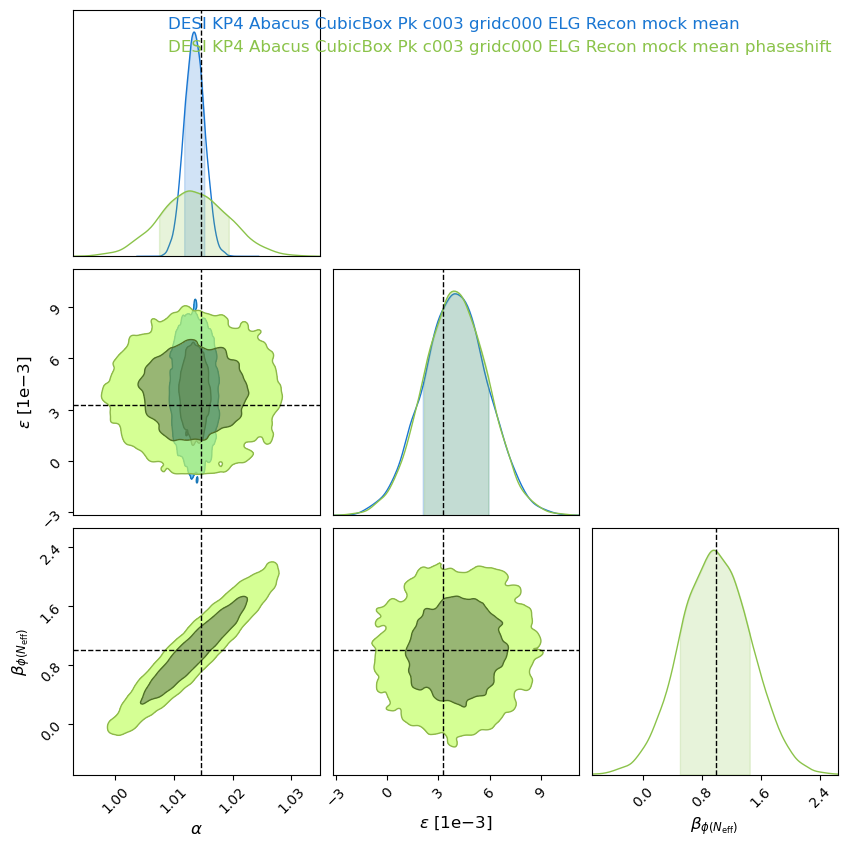

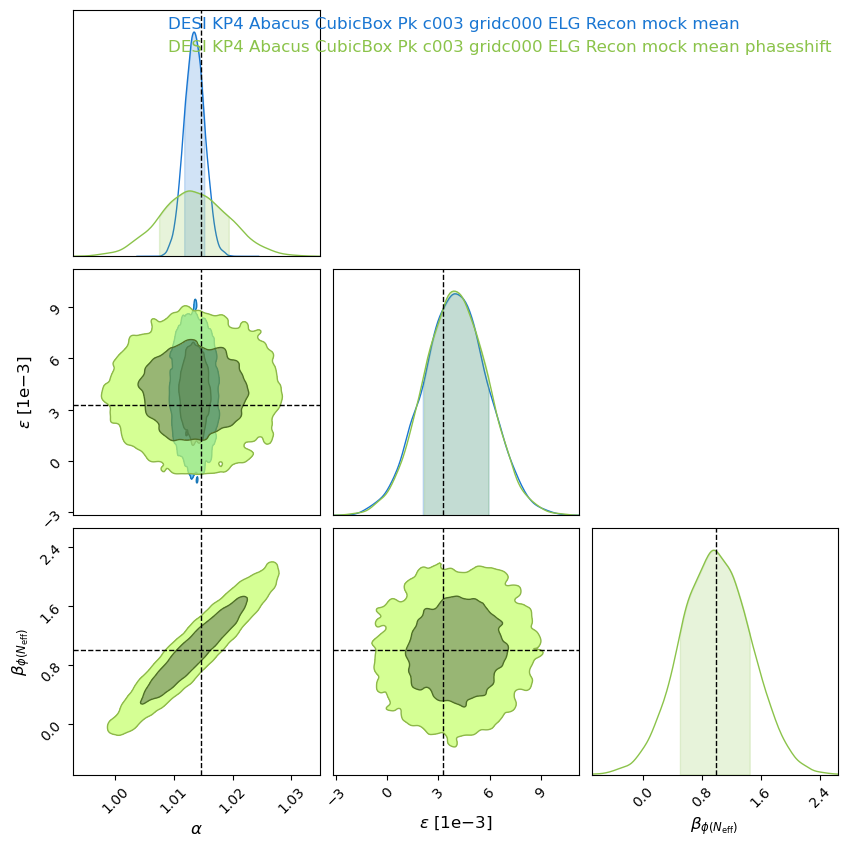

In [1]:
# Import some necessary modules
import os
import sys
import pickle
import logging
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from chainconsumer import ChainConsumer     

sys.path.append("../../Barry/")     # Change this so that it points to where you have Barry installed

#from barry.samplers import DynestySampler
from barry.samplers import NautilusSampler
from barry.config import setup
from barry.models import PowerBeutler2017, CorrBeutler2017
from barry.datasets.dataset_power_spectrum import PowerSpectrum_DESI_KP4
from barry.datasets.dataset_correlation_function import CorrelationFunction_DESI_KP4
from barry.fitter import Fitter
from barry.models.model import Correction # class for applying corrections to the likelihood function 
from barry.utils import weighted_avg_and_cov # function for getting avg and covariance 

pfn1 = "/global/u1/a/abbew25/barryrepo/Barry/cosmodesi_KP4ELG_examplecode_make_picklefiles/plots/desi_kp4_abacus_cubic_ELG-c003-template003/output/desi_kp4_abacus_cubic_ELG-c003-template003.fitter.pkl"

pfn2 = "/global/u1/a/abbew25/barryrepo/Barry/cosmodesi_KP4ELG_examplecode_make_picklefiles/plots/desi_kp4_abacus_cubic_ELG_phaseshiftfree-c003-template003/output/desi_kp4_abacus_cubic_ELG_phaseshiftfree-c003-template003.fitter.pkl"
    
pfns = [
        pfn1, 
        pfn2
]


c = ChainConsumer() 

for i,p in enumerate(pfns): 
    with open(p, 'rb') as pickle_file:
        fitter = pickle.load(pickle_file)

    for posterior, weight, chain, evidence, model, data, extra in fitter.load():
        
        
        if 'mean' not in extra['name']:  # making sure we only get chain for mock mean 
            continue 
            
        if 'Prerecon' in extra['name']: # making sure we only get results from recon 
            continue  
                
        df = pd.DataFrame(chain, columns=model.get_labels())
        
        print(df)
    
        # Compute alpha_par and alpha_perp for each point in the chain
        alpha_par, alpha_perp = model.get_alphas(df["$\\alpha$"].to_numpy(), df["$\\epsilon$"].to_numpy())
        df["$\\alpha_\\parallel$"] = alpha_par
        df["$\\alpha_\\perp$"] = alpha_perp
        
        # Add the chain or MAP to the Chainconsumer plots
        #print(extra)
        extraname = ''
        if i == 1:
            extraname = ' phaseshift'
            
        extra.pop("realisation", 'mean' + extraname)
        extra["name"] = extra['name'] + extraname
        
        #print(extra)
        #print(df)

        c.add_chain(df, weights=weight, **extra, plot_contour=True, plot_point=False, show_as_1d_prior=False)
        #print('test')
    
#couplingterm = 1.0/0.22710731766023898
#beta_approx = (3.044/(3.044+couplingterm) * (3.7+couplingterm)/3.7) 

alpha, eps = model.get_reverse_alphas(1.02131937, 1.01131066) 

truth = {"$\\alpha$": alpha, "$\\epsilon$": eps, "$\\alpha_\\parallel$": 1.02131937, "$\\alpha_\\perp$": 1.01131066, 
         "$\\beta_{\\phi(N_{\\mathrm{eff}})}$": 1.0}

parameters = [names for names in truth]

c.plotter.plot(
    truth=truth,
        parameters = parameters[:2]+parameters[4:], 
        legend=True,
        display=False,
        figsize=(9,9), 
)

## comparing smoothing methods results for phase shift constraints for c000 ELG mocks with c000 clustering 

INFO:barry:Loading chains
INFO:barry:Loaded 207 chains
INFO:barry:Dont need to load any pregen data
INFO:barry:Setting default RSD parameter to beta=0.75595 with 0.40000 fractional width
INFO:barry:Broadband Delta fixed to 0.06341048386491492
INFO:barry:Dont need to load any pregen data
INFO:barry:Setting default RSD parameter to beta=0.75509 with 0.40000 fractional width
INFO:barry:Broadband Delta fixed to 0.06341048386491492
INFO:barry:Loading chains
INFO:barry:Loaded 207 chains


Maximum likelihood nuisance parameters at maximum a posteriori point are [ 5.28717160e-01 -5.93058174e+03 -1.29871451e+03 -3.46988667e+02
 -2.41040596e+02 -1.74605825e+02 -8.24746085e+01 -5.55487951e+01
  9.50774585e+01 -1.22123244e+04 -2.51070538e+03 -8.84828444e+02
 -6.91169362e+02 -5.05163750e+02 -3.33757516e+02 -2.52736836e+02
 -1.50543602e+02]
Chi squared/dof is 129.35234453090158/88 at these values
Maximum likelihood nuisance parameters at maximum a posteriori point are [ 5.30400466e-01 -1.01830848e+04 -1.50107844e+03 -4.30863568e+02
 -2.93427497e+02 -2.04316293e+02 -1.10582617e+02 -7.20701486e+01
  3.13165903e+01 -1.88366518e+04 -2.22406443e+03 -9.40191924e+02
 -7.43236724e+02 -5.42603721e+02 -3.78148553e+02 -2.82111661e+02
 -2.52999262e+02]
Chi squared/dof is 89.91359766629466/88 at these values


INFO:barry:Dont need to load any pregen data
INFO:barry:Setting default RSD parameter to beta=0.75595 with 0.40000 fractional width
INFO:barry:Broadband Delta fixed to 0.06341048386491492
INFO:barry:Dont need to load any pregen data
INFO:barry:Setting default RSD parameter to beta=0.75509 with 0.40000 fractional width
INFO:barry:Broadband Delta fixed to 0.06341048386491492
INFO:barry:Loading chains
INFO:barry:Loaded 208 chains


Maximum likelihood nuisance parameters at maximum a posteriori point are [ 5.28394130e-01 -5.82209722e+03 -1.34912115e+03 -3.72225549e+02
 -2.64451777e+02 -1.96800925e+02 -1.04136806e+02 -7.62819526e+01
  7.45641960e+01 -1.25712814e+04 -2.67091753e+03 -9.63288105e+02
 -7.56069913e+02 -5.64372695e+02 -3.90097229e+02 -3.05504025e+02
 -2.10932047e+02]
Chi squared/dof is 129.27710924283377/88 at these values
Maximum likelihood nuisance parameters at maximum a posteriori point are [ 5.32923238e-01 -1.00252987e+04 -1.50103264e+03 -4.15142315e+02
 -2.73039194e+02 -1.81561367e+02 -8.75778362e+01 -4.89465302e+01
  5.10071279e+01 -1.81385898e+04 -2.06413007e+03 -8.54021889e+02
 -6.70438797e+02 -4.74503456e+02 -3.13602022e+02 -2.20875471e+02
 -1.94852190e+02]
Chi squared/dof is 89.89545724180448/88 at these values


INFO:barry:Dont need to load any pregen data
INFO:barry:Setting default RSD parameter to beta=0.75595 with 0.40000 fractional width
INFO:barry:Broadband Delta fixed to 0.06341048386491492
INFO:barry:Dont need to load any pregen data
INFO:barry:Setting default RSD parameter to beta=0.75509 with 0.40000 fractional width
INFO:barry:Broadband Delta fixed to 0.06341048386491492


Maximum likelihood nuisance parameters at maximum a posteriori point are [ 5.28505887e-01 -5.46559850e+03 -1.28018696e+03 -3.49383791e+02
 -2.52996856e+02 -1.89741437e+02 -9.88612135e+01 -7.24565000e+01
  8.17400310e+01 -1.19423128e+04 -2.51437394e+03 -9.12580449e+02
 -7.30344143e+02 -5.48095355e+02 -3.77979032e+02 -2.95897957e+02
 -2.02206705e+02]
Chi squared/dof is 129.33858743410485/88 at these values
Maximum likelihood nuisance parameters at maximum a posteriori point are [ 5.27041707e-01 -9.41858951e+03 -1.31192390e+03 -3.75981678e+02
 -2.72031125e+02 -1.95568020e+02 -1.07379324e+02 -7.22233958e+01
  3.66402799e+01 -1.80589595e+04 -1.93696112e+03 -8.64887689e+02
 -7.17147975e+02 -5.35626030e+02 -3.79313933e+02 -2.87649402e+02
 -2.59252397e+02]
Chi squared/dof is 89.99290432585579/88 at these values


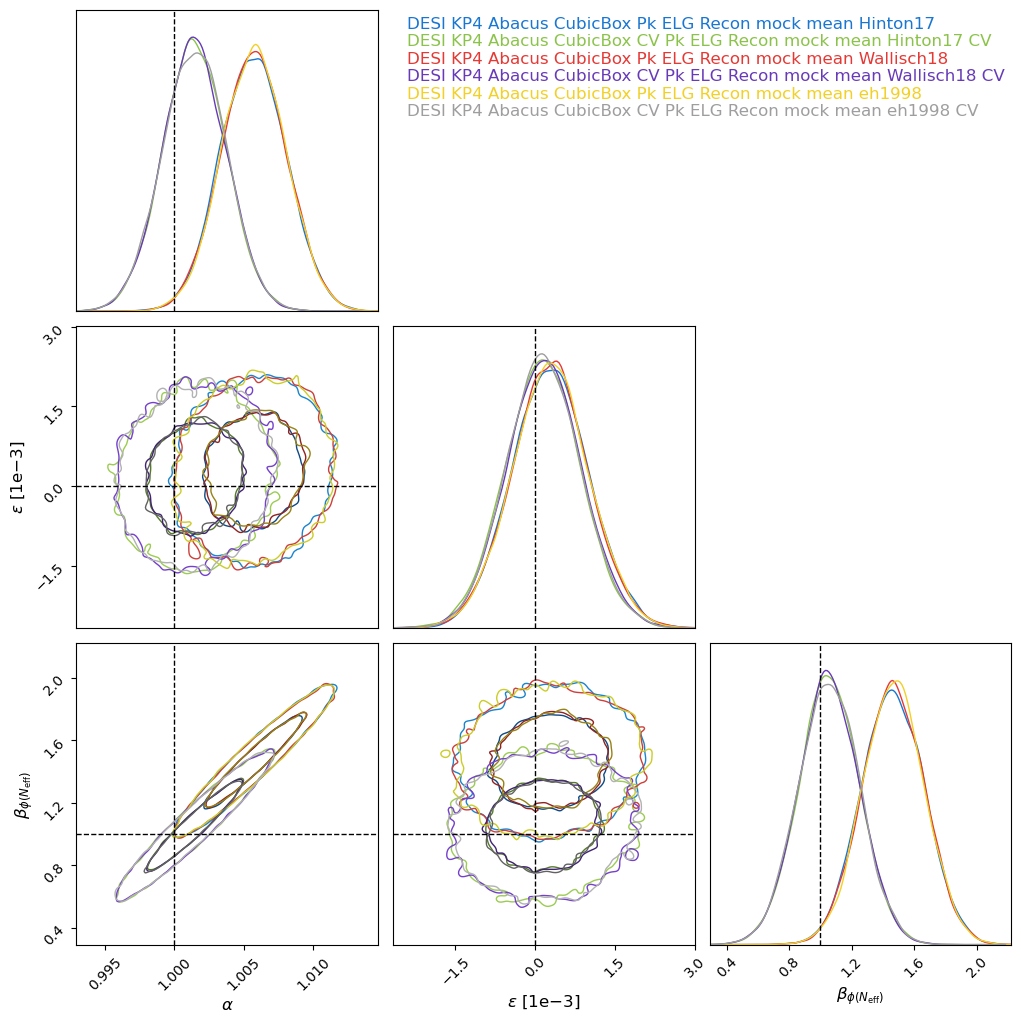

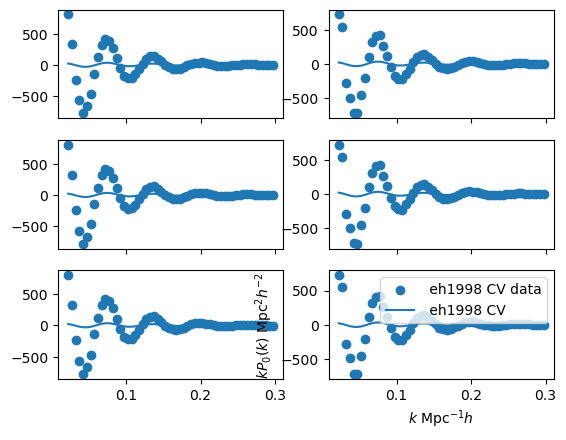

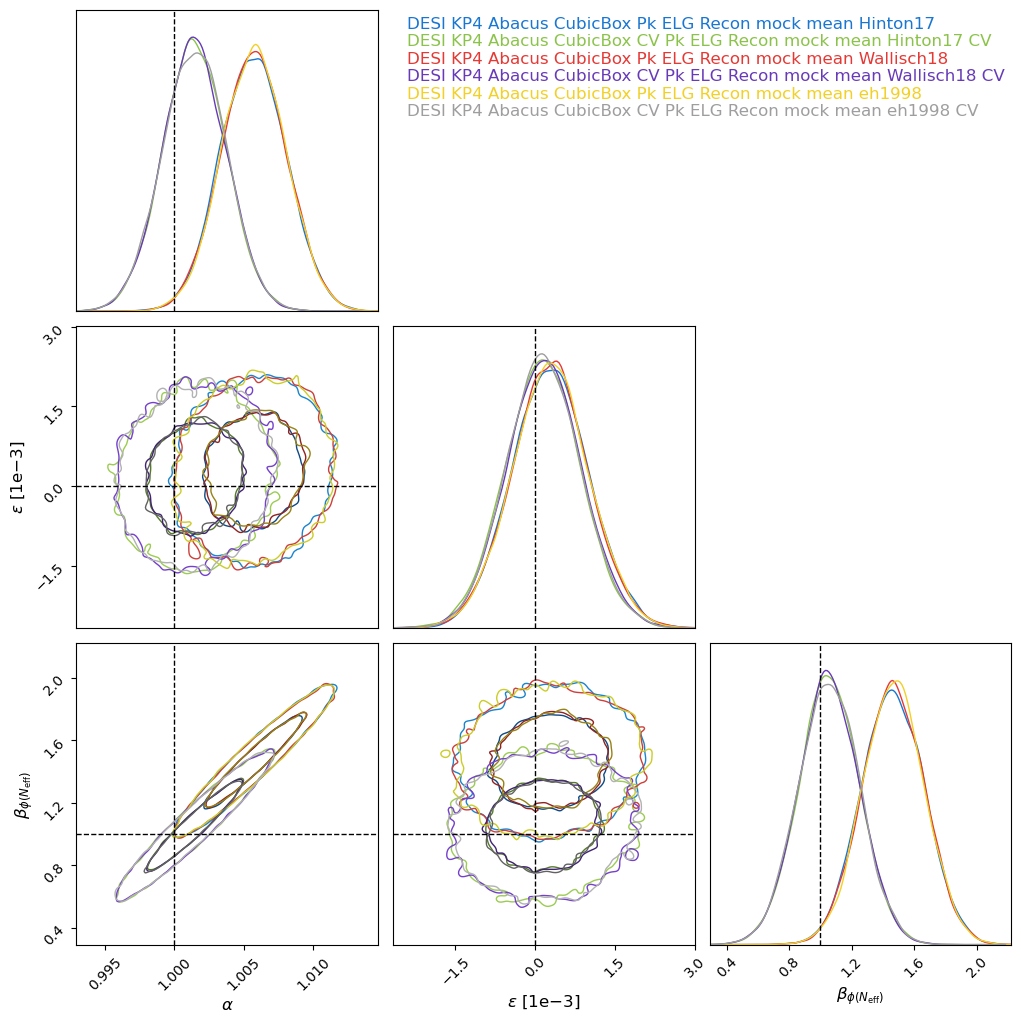

In [19]:
# Import some necessary modules
import os
import sys
import pickle
import logging
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from chainconsumer import ChainConsumer     

sys.path.append("../../Barry/")     # Change this so that it points to where you have Barry installed

#from barry.samplers import DynestySampler
from barry.samplers import NautilusSampler
from barry.config import setup
from barry.models import PowerBeutler2017, CorrBeutler2017
from barry.datasets.dataset_power_spectrum import PowerSpectrum_DESI_KP4
from barry.datasets.dataset_correlation_function import CorrelationFunction_DESI_KP4
from barry.fitter import Fitter
from barry.models.model import Correction # class for applying corrections to the likelihood function 
from barry.utils import weighted_avg_and_cov # function for getting avg and covariance 


pfn1 = "/global/u1/a/abbew25/barryrepo/Barry/cosmodesi_KP4ELG_examplecode_make_picklefiles/plots/desi_kp4_abacus_cubic_ELG_phaseshiftfree/output/desi_kp4_abacus_cubic_ELG_phaseshiftfree.fitter.pkl"

pfn2 = "/global/u1/a/abbew25/barryrepo/Barry/cosmodesi_KP4ELG_examplecode_make_picklefiles/plots/desi_kp4_abacus_cubic_ELG_phaseshiftfree-wallisch18/output/desi_kp4_abacus_cubic_ELG_phaseshiftfree-wallisch18.fitter.pkl"

pfn3 = "/global/u1/a/abbew25/barryrepo/Barry/cosmodesi_KP4ELG_examplecode_make_picklefiles/plots/desi_kp4_abacus_cubic_ELG_phaseshiftfree-eh1998/output/desi_kp4_abacus_cubic_ELG_phaseshiftfree-eh1998.fitter.pkl"

pfns = [
    
        pfn1, 
        pfn2,
        pfn3
]


c = ChainConsumer() 

fig, axes = plt.subplots(3, 2, sharex=True, sharey=True)

#ks = np.logspace(-3, 2, 100, base=10)

for i,p in enumerate(pfns): 
    with open(p, 'rb') as pickle_file:
        fitter = pickle.load(pickle_file)

    count = 0
    for posterior, weight, chain, evidence, model, data, extra in fitter.load():
        
        
        if 'mean' not in extra['name']:  # making sure we only get chain for mock mean 
            continue 
            
        if 'Prerecon' in extra['name']: # making sure we only get results from recon 
            continue  
            
        # if 'CV' in extra['name']:
        #     continue
            
        if 'Xi' in extra['name']:
            continue
                
        df = pd.DataFrame(chain, columns=model.get_labels())
    
        # Compute alpha_par and alpha_perp for each point in the chain
        alpha_par, alpha_perp = model.get_alphas(df["$\\alpha$"].to_numpy(), df["$\\epsilon$"].to_numpy())
        df["$\\alpha_\\parallel$"] = alpha_par
        df["$\\alpha_\\perp$"] = alpha_perp
        
        # Add the chain or MAP to the Chainconsumer plots
        #print(extra)
        extraname = ''
        if i == 0:
            extraname = ' Hinton17'
        elif i == 1:
            extraname = ' Wallisch18'
        elif i == 2:
            extraname = ' eh1998'
            
        if 'CV' in extra['name']:
            extraname = extraname + ' CV'
            
        extra.pop("realisation", 'mean' + extraname)
        extra["name"] = extra['name'] + extraname
       
        c.add_chain(df, weights=weight, **extra, plot_contour=True, plot_point=False, show_as_1d_prior=False)
        
        model.set_data(data)
        r_s = model.camb.get_data()["r_s"]
        max_post = posterior.argmax()
        params = df.loc[max_post]
        params_dict = model.get_param_dict(chain[max_post])
        for name, val in params_dict.items():
            model.set_default(name, val)

        new_chi_squared, dof, bband, mods, smooths = model.plot(params_dict, display=False)
        k = model.data[0]["ks"]
        axes[i][count].scatter(k, (model.data[0]['pk0'][0]- smooths[0][0])*k, label= extraname + ' data')
        axes[i][count].plot(k, (mods[0][0] - smooths[0][0])*k, label=extraname)
        axes[i][count].legend()
        count += 1
        
        
plt.subplots_adjust(wspace=0, hspace=0)        
        
        
#couplingterm = 1.0/0.22710731766023898
#beta_approx = (3.044/(3.044+couplingterm) * (3.7+couplingterm)/3.
#alpha, eps = model.get_reverse_alphas(1.02131937, 1.01131066) 



truth = {"$\\alpha$": 1.0, "$\\epsilon$": 0.0, "$\\alpha_\\parallel$": 1, "$\\alpha_\\perp$": 1,
         "$\\beta_{\\phi(N_{\\mathrm{eff}})}$": 1.0}

parameters = [names for names in truth]

plt.legend()
plt.xlabel(r'$k$ $\mathrm{Mpc}^{-1} h$')
plt.ylabel(r'$k P_0(k)$ $\mathrm{Mpc}^2 h^{-2}$')

c.plotter.plot(
    truth=truth,
        parameters = parameters[:2]+parameters[4:], 
        legend=True,
        display=False,
        figsize=(11, 11), 
)

## comparing smoothing methods results for phase shift constraints for c003 ELG mocks with c000 clustering, c000 template

INFO:barry:Loading chains
INFO:barry:Loaded 14 chains
INFO:barry:Dont need to load any pregen data
INFO:barry:Setting default RSD parameter to beta=0.66126 with 0.40000 fractional width
INFO:barry:Broadband Delta fixed to 0.06341048386491492
INFO:barry:Loading chains
INFO:barry:Loaded 14 chains
INFO:barry:Dont need to load any pregen data
INFO:barry:Setting default RSD parameter to beta=0.66126 with 0.40000 fractional width
INFO:barry:Broadband Delta fixed to 0.06341048386491492
INFO:barry:Loading chains
INFO:barry:Loaded 14 chains
INFO:barry:Dont need to load any pregen data
INFO:barry:Setting default RSD parameter to beta=0.66126 with 0.40000 fractional width
INFO:barry:Broadband Delta fixed to 0.06341048386491492


Maximum likelihood nuisance parameters at maximum a posteriori point are [ 6.40446462e-01 -3.39811755e+03 -1.50010532e+03 -7.65907672e+01
  3.54681808e+01 -5.21785445e+01 -5.65770514e+01 -4.52403129e+01
  1.20423470e+02  4.40282719e+03 -6.07713088e+02  1.88641964e+02
 -1.37579150e+02 -3.39175972e+02 -3.40721743e+02 -3.00009841e+02
 -5.37531278e+01]
Chi squared/dof is 222.4041089778391/88 at these values
Maximum likelihood nuisance parameters at maximum a posteriori point are [ 6.35156248e-01 -1.49137399e+03 -1.15217219e+03  3.21746205e+01
  8.16168503e+01 -3.01440854e+01 -4.43071203e+01 -4.06647064e+01
  1.44477022e+02  5.72486063e+03 -1.70801642e+02  3.09756037e+02
 -8.64274557e+01 -3.19770788e+02 -3.30699206e+02 -3.02789662e+02
 -2.12257248e+01]
Chi squared/dof is 222.75828687609118/88 at these values
Maximum likelihood nuisance parameters at maximum a posteriori point are [ 6.20147734e-01 -3.69925956e+03 -1.37906591e+03 -4.28086639e+01
  5.23353942e+01 -4.13025539e+01 -4.95560535e+0

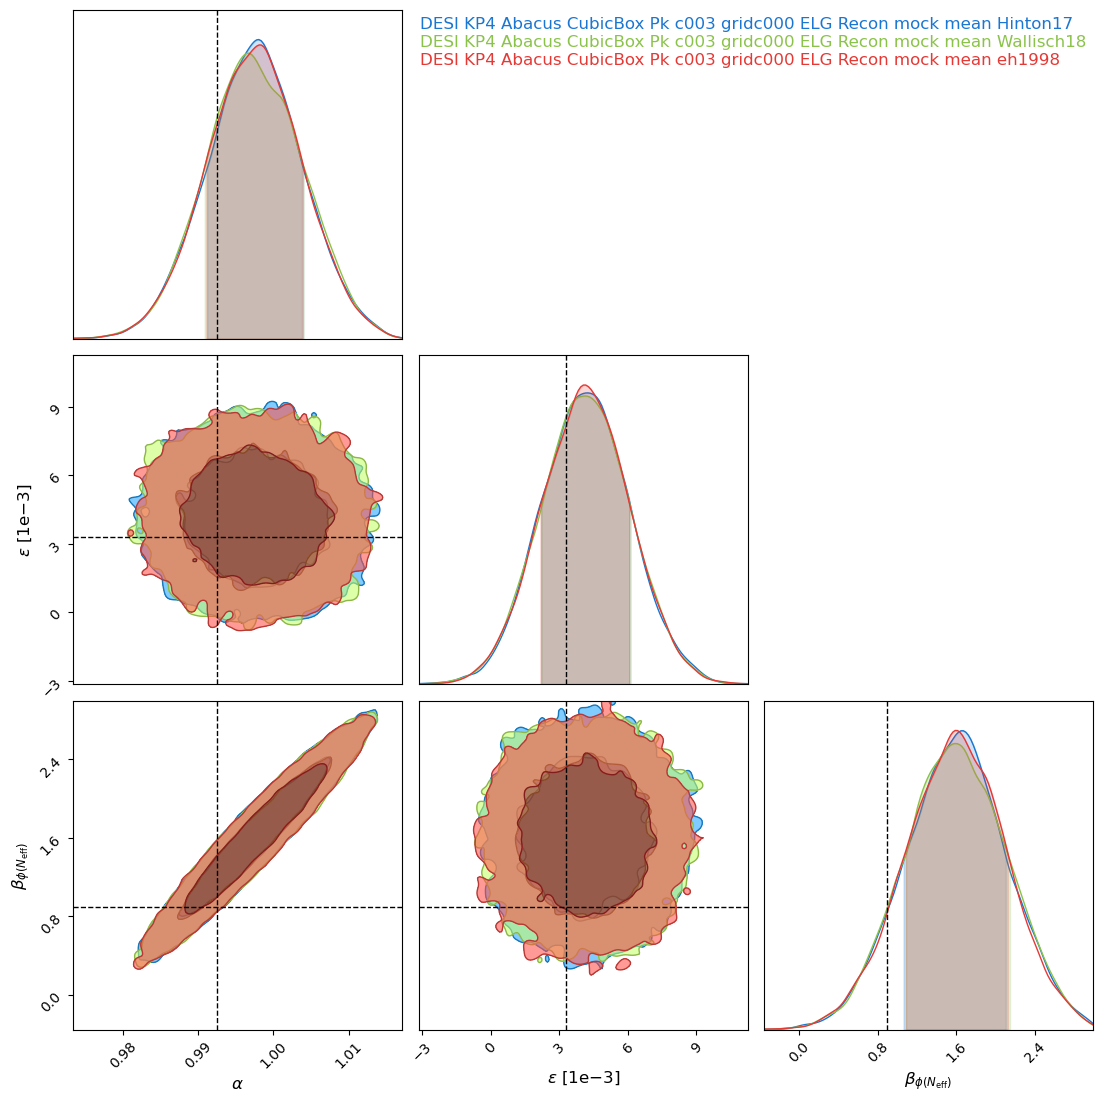

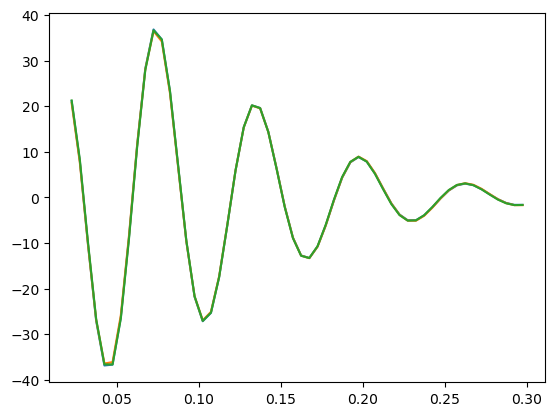

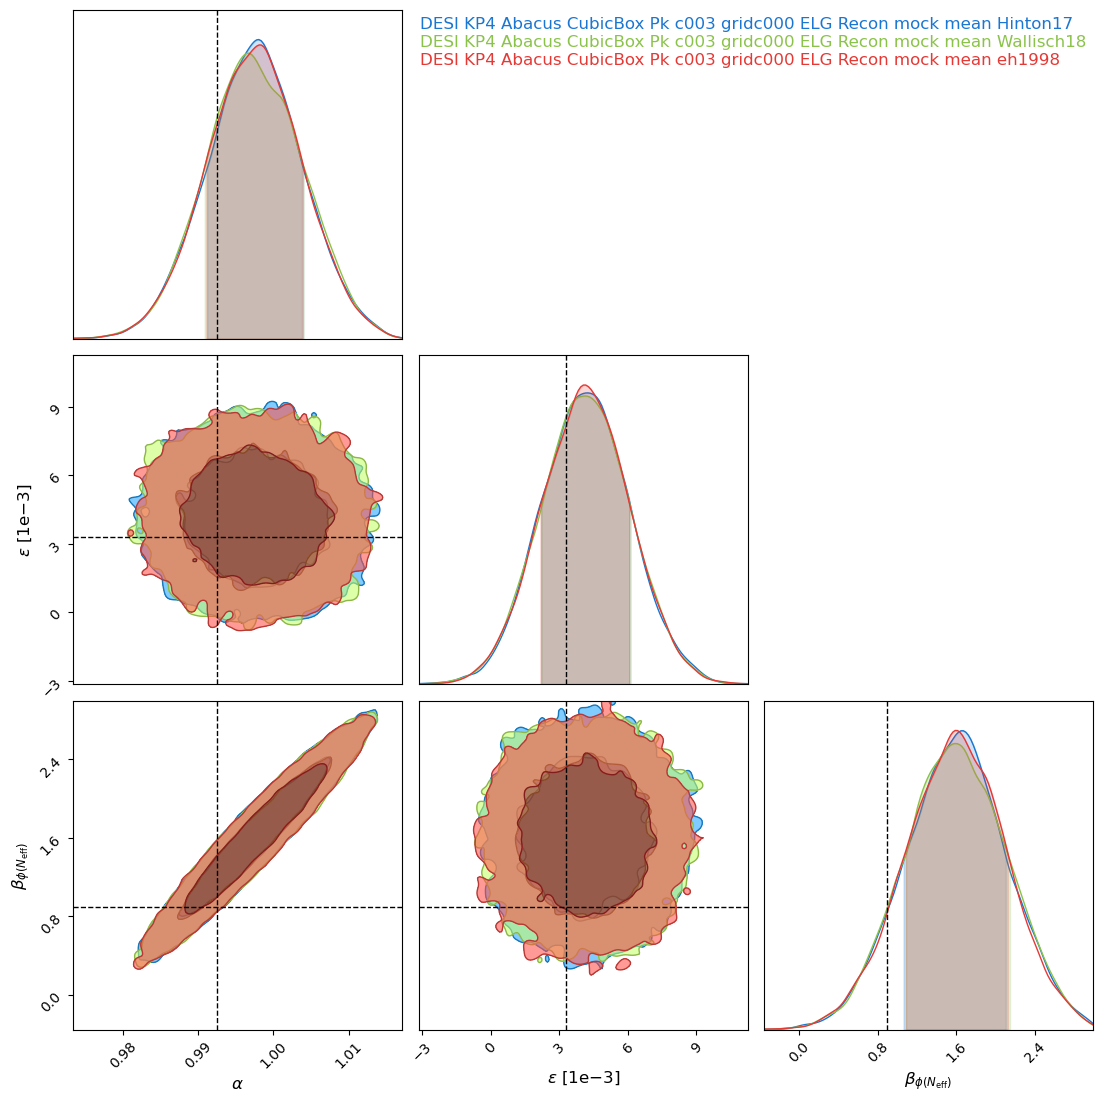

In [16]:
# Import some necessary modules
import os
import sys
import pickle
import logging
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from chainconsumer import ChainConsumer     

sys.path.append("../../Barry/")     # Change this so that it points to where you have Barry installed

#from barry.samplers import DynestySampler
from barry.samplers import NautilusSampler
from barry.config import setup
from barry.models import PowerBeutler2017, CorrBeutler2017
from barry.datasets.dataset_power_spectrum import PowerSpectrum_DESI_KP4
from barry.datasets.dataset_correlation_function import CorrelationFunction_DESI_KP4
from barry.fitter import Fitter
from barry.models.model import Correction # class for applying corrections to the likelihood function 
from barry.utils import weighted_avg_and_cov # function for getting avg and covariance 


pfn1 = "/global/u1/a/abbew25/barryrepo/Barry/cosmodesi_KP4ELG_examplecode_make_picklefiles/plots/desi_kp4_abacus_cubic_ELG_phaseshiftfree-c003/output/desi_kp4_abacus_cubic_ELG_phaseshiftfree-c003.fitter.pkl"

pfn2 = "/global/u1/a/abbew25/barryrepo/Barry/cosmodesi_KP4ELG_examplecode_make_picklefiles/plots/desi_kp4_abacus_cubic_ELG_phaseshiftfree-c003-Wallisch/output/desi_kp4_abacus_cubic_ELG_phaseshiftfree-c003-Wallisch.fitter.pkl"

pfn3 = "/global/u1/a/abbew25/barryrepo/Barry/cosmodesi_KP4ELG_examplecode_make_picklefiles/plots/desi_kp4_abacus_cubic_ELG_phaseshiftfree-c003-eh1998/output/desi_kp4_abacus_cubic_ELG_phaseshiftfree-c003-eh1998.fitter.pkl"


# pfn1 = "/global/u1/a/abbew25/barryrepo/Barry/cosmodesi_KP4ELG_examplecode_make_picklefiles/plots/desi_kp4_abacus_cubic_ELG_phaseshiftfree-c003-template003/output/desi_kp4_abacus_cubic_ELG_phaseshiftfree-c003-template003.fitter.pkl"

# pfn2 = "/global/u1/a/abbew25/barryrepo/Barry/cosmodesi_KP4ELG_examplecode_make_picklefiles/plots/desi_kp4_abacus_cubic_ELG_phaseshiftfree-c003-template003-Wallisch/output/desi_kp4_abacus_cubic_ELG_phaseshiftfree-c003-template003-Wallisch.fitter.pkl"

# pfn3 = "/global/u1/a/abbew25/barryrepo/Barry/cosmodesi_KP4ELG_examplecode_make_picklefiles/plots/desi_kp4_abacus_cubic_ELG_phaseshiftfree-c003-template003-eh1998/output/desi_kp4_abacus_cubic_ELG_phaseshiftfree-c003-template003-eh1998.fitter.pkl"

pfns = [
        pfn1, 
        pfn2,
        pfn3
]

c = ChainConsumer() 

for i,p in enumerate(pfns): 
    with open(p, 'rb') as pickle_file:
        fitter = pickle.load(pickle_file)

    for posterior, weight, chain, evidence, model, data, extra in fitter.load():
        
        
        if 'mean' not in extra['name']:  # making sure we only get chain for mock mean 
            continue 
            
        if 'Prerecon' in extra['name']: # making sure we only get results from recon 
            continue  
            
        #if 'CV' not in extra['name']:
        #    continue
                
        df = pd.DataFrame(chain, columns=model.get_labels())
        
        #print(df)
    
        # Compute alpha_par and alpha_perp for each point in the chain
        alpha_par, alpha_perp = model.get_alphas(df["$\\alpha$"].to_numpy(), df["$\\epsilon$"].to_numpy())
        df["$\\alpha_\\parallel$"] = alpha_par
        df["$\\alpha_\\perp$"] = alpha_perp
        
        # Add the chain or MAP to the Chainconsumer plots
        #print(extra)
        extraname = ''
        if i == 0:
            extraname = ' Hinton17'
        elif i == 1:
            extraname = ' Wallisch18'
        elif i == 2:
            extraname = ' eh1998'
            
        extra.pop("realisation", 'mean' + extraname)
        extra["name"] = extra['name'] + extraname
        
        #print(extra)
        #print(df)

        c.add_chain(df, weights=weight, **extra, plot_contour=True, plot_point=False, show_as_1d_prior=False)
        #print('test')
        
        model.set_data(data)
        r_s = model.camb.get_data()["r_s"]
        max_post = posterior.argmax()
        params = df.loc[max_post]
        params_dict = model.get_param_dict(chain[max_post])
        for name, val in params_dict.items():
            model.set_default(name, val)

        new_chi_squared, dof, bband, mods, smooths = model.plot(params_dict, display=False)
        k = model.data[0]["ks"]
        #plt.scatter(k, model.data[0]['pk0'][0]- smooths[0][0], label= extraname + ' data')
        plt.plot(k, (mods[0][0] - smooths[0][0])*k, label=extraname)
        
    
couplingterm = 1.0/0.22710731766023898
beta_approx = (3.044/(3.044+couplingterm) * (3.7+couplingterm)/3.7) 

alpha, eps = model.get_reverse_alphas(0.99906947, 0.98927880) 

truth = {"$\\alpha$": alpha, "$\\epsilon$": eps, "$\\alpha_\\parallel$": 0.99906947, "$\\alpha_\\perp$": 0.98927880, 
         "$\\beta_{\\phi(N_{\\mathrm{eff}})}$": beta_approx}


# alpha, eps = model.get_reverse_alphas(1.02131937, 1.01131066) 

# truth = {"$\\alpha$": alpha, "$\\epsilon$": eps, "$\\alpha_\\parallel$": 1.02131937, "$\\alpha_\\perp$": 1.01131066, 
#          "$\\beta_{\\phi(N_{\\mathrm{eff}})}$": 1.0}


parameters = [names for names in truth]

c.plotter.plot(
    truth=truth,
        parameters = parameters[:2]+parameters[4:],#+["$\\beta$"], 
        legend=True,
        display=False,
        figsize=(12, 12), 
)

## plot results with Hinton dewiggling - different broadband settings, c000/grid000 mocks - power spectrum only 

INFO:barry:Loading chains
INFO:barry:Loaded 208 chains
INFO:barry:Dont need to load any pregen data
INFO:barry:Setting default RSD parameter to beta=0.75595 with 0.40000 fractional width
INFO:barry:Broadband Delta fixed to 0.06341048386491492
INFO:barry:Dont need to load any pregen data
INFO:barry:Setting default RSD parameter to beta=0.75509 with 0.40000 fractional width
INFO:barry:Broadband Delta fixed to 0.06341048386491492
INFO:barry:Loading chains


Maximum likelihood nuisance parameters at maximum a posteriori point are [ 5.26236111e-01 -7.49387194e+03 -1.28021620e+03 -3.65283359e+02
 -2.62623032e+02 -1.96757180e+02 -1.06805731e+02 -7.61870439e+01
  5.15918107e+01 -1.18273406e+04 -2.20233858e+03 -8.34754401e+02
 -7.02070861e+02 -5.40180150e+02 -3.78391957e+02 -3.01974529e+02
 -1.96434892e+02]
Chi squared/dof is 134.73042060565552/89 at these values
Maximum likelihood nuisance parameters at maximum a posteriori point are [ 5.26730100e-01 -9.80910389e+03 -1.42836571e+03 -4.03305642e+02
 -2.76976315e+02 -1.91829727e+02 -9.99827572e+01 -6.28485640e+01
  4.38863705e+01 -1.91497343e+04 -2.25454178e+03 -9.40837014e+02
 -7.32653931e+02 -5.27765705e+02 -3.61791166e+02 -2.64724416e+02
 -2.42642229e+02]
Chi squared/dof is 89.72005779965171/89 at these values


INFO:barry:Loaded 104 chains
INFO:barry:Dont need to load any pregen data
INFO:barry:Setting default RSD parameter to beta=0.75595 with 0.40000 fractional width
INFO:barry:Dont need to load any pregen data
INFO:barry:Setting default RSD parameter to beta=0.75509 with 0.40000 fractional width


Maximum likelihood nuisance parameters at maximum a posteriori point are [ 5.12804075e-01 -3.52308172e+02  4.99588895e+02 -6.44873271e+02
  2.78363483e+02 -3.77805538e+01 -5.98612476e+02  2.67839789e+02
 -8.38496994e+02  4.21226902e+02 -6.16268881e+01]
Chi squared/dof is 172.48880975782063/95 at these values
Maximum likelihood nuisance parameters at maximum a posteriori point are [ 5.15071232e-01 -4.01437854e+02  4.44596460e+02 -5.80988348e+02
  2.54758200e+02 -3.48554607e+01 -5.93167207e+02 -5.16546526e+01
 -5.51666092e+02  3.20216582e+02 -4.90616809e+01]
Chi squared/dof is 117.59623909820327/95 at these values


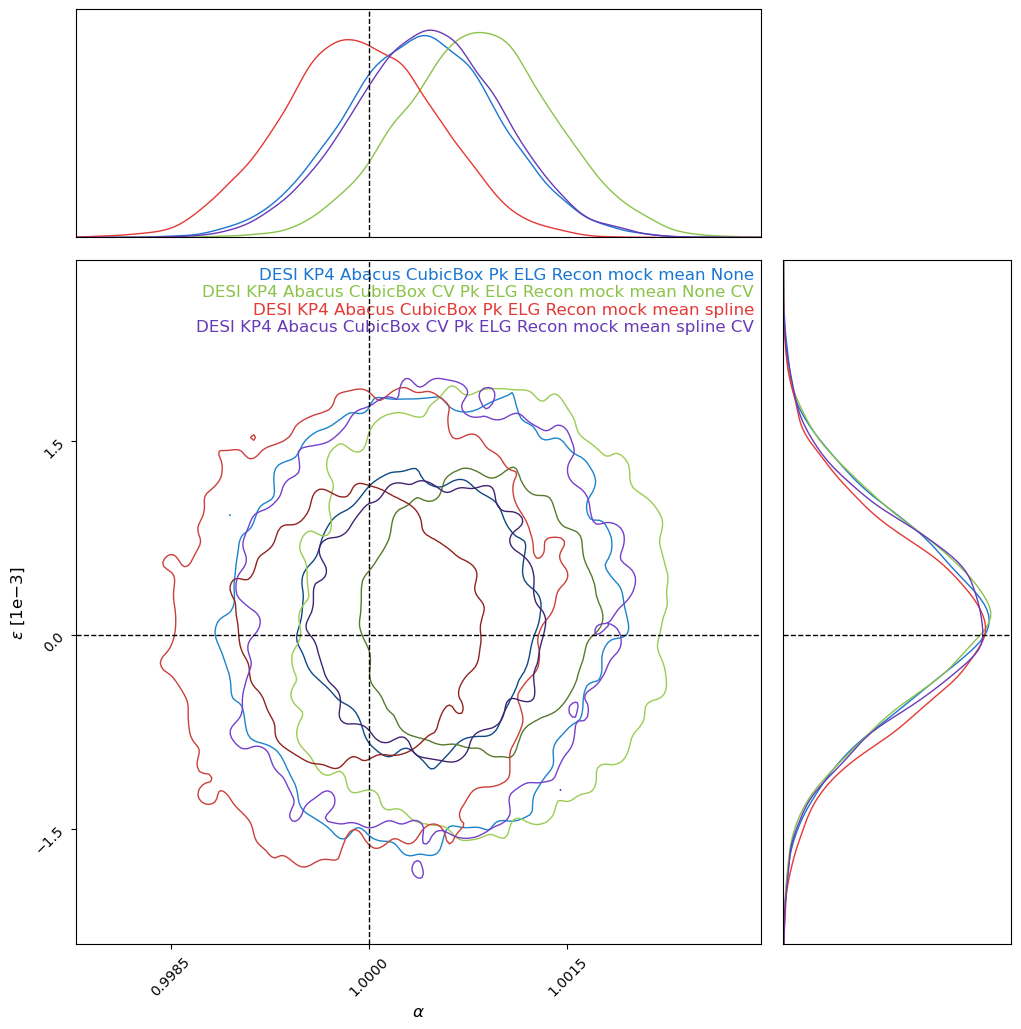

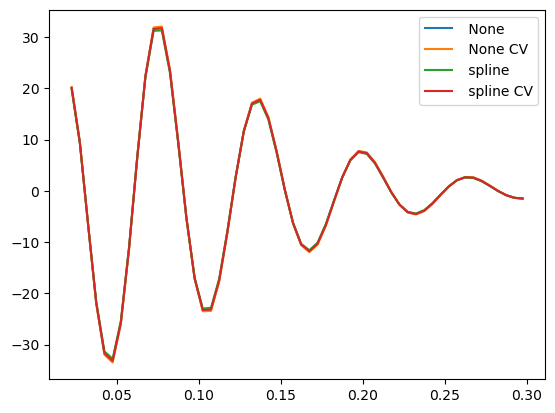

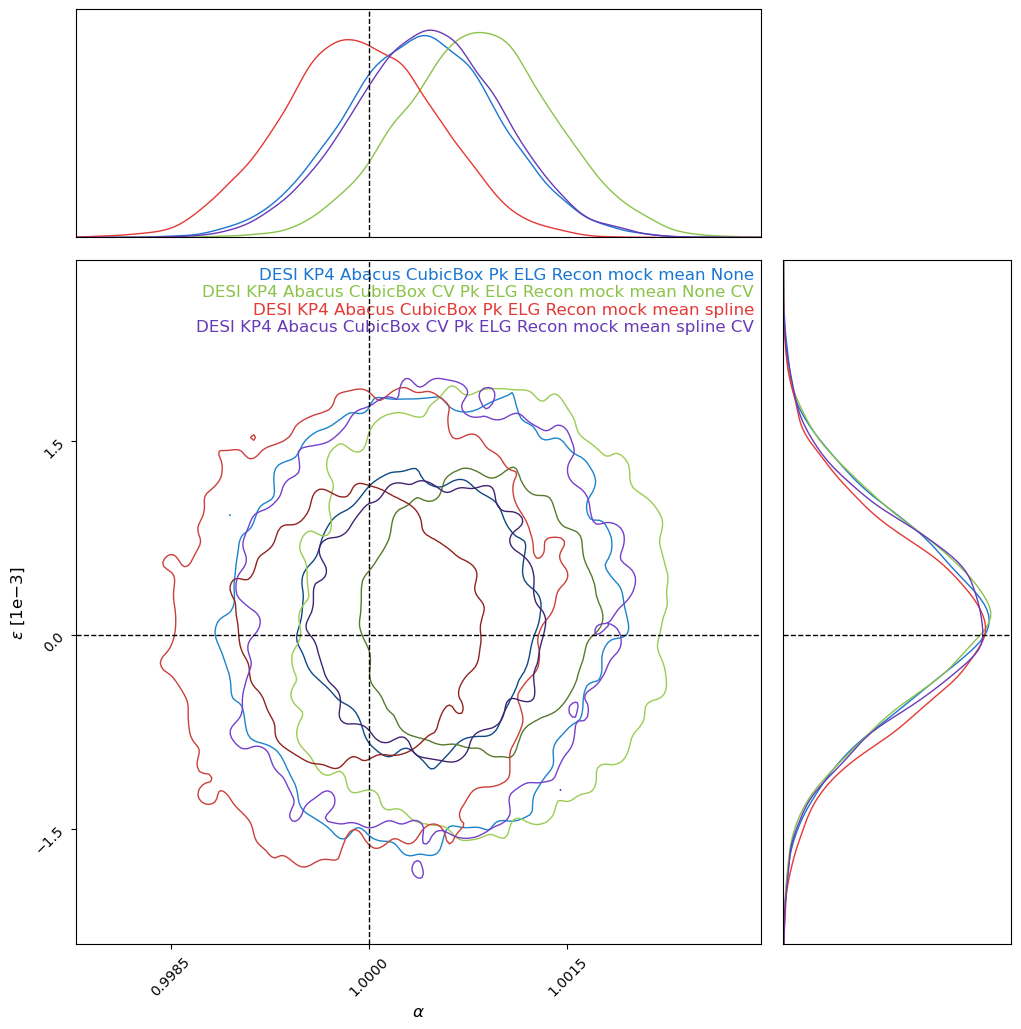

In [10]:
# Import some necessary modules
import os
import sys
import pickle
import logging
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from chainconsumer import ChainConsumer     

sys.path.append("../../Barry/")     # Change this so that it points to where you have Barry installed

#from barry.samplers import DynestySampler
from barry.samplers import NautilusSampler
from barry.config import setup
from barry.models import PowerBeutler2017, CorrBeutler2017
from barry.datasets.dataset_power_spectrum import PowerSpectrum_DESI_KP4
from barry.datasets.dataset_correlation_function import CorrelationFunction_DESI_KP4
from barry.fitter import Fitter
from barry.models.model import Correction # class for applying corrections to the likelihood function 
from barry.utils import weighted_avg_and_cov # function for getting avg and covariance 


pfn1 = "/global/u1/a/abbew25/barryrepo/Barry/cosmodesi_KP4ELG_examplecode_make_picklefiles/plots/desi_kp4_abacus_cubic_ELG/output/desi_kp4_abacus_cubic_ELG.fitter.pkl"

# pfn2 = "/global/u1/a/abbew25/barryrepo/Barry/cosmodesi_KP4ELG_examplecode_make_picklefiles/plots/desi_kp4_abacus_cubic_ELG_splinebroadband/output/desi_kp4_abacus_cubic_ELG_splinebroadband.fitter.pkl"

pfn3 = "/global/u1/a/abbew25/barryrepo/Barry/cosmodesi_KP4ELG_examplecode_make_picklefiles/plots/desi_kp4_abacus_cubic_ELG-broadbandpoly/output/desi_kp4_abacus_cubic_ELG-broadbandpoly.fitter.pkl"

pfns = [
    
        pfn1, 
        #pfn2,
        pfn3
]


c = ChainConsumer() 

# fig, axes = plt.subplots(3, 2, sharex=True, sharey=True)

# ks = np.logspace(-3, 2, 100, base=10)

for i,p in enumerate(pfns): 
    #print(i)
    with open(p, 'rb') as pickle_file:
        fitter = pickle.load(pickle_file)

    count = 0
    for posterior, weight, chain, evidence, model, data, extra in fitter.load():
        
        
        if 'mean' not in extra['name']:  # making sure we only get chain for mock mean 
            continue 
            
        if 'Prerecon' in extra['name']: # making sure we only get results from recon 
            continue  
            
        # if 'CV' in extra['name']:
        #     continue
            
        if 'Xi' in extra['name']:
            continue
                
        df = pd.DataFrame(chain, columns=model.get_labels())
    
        # Compute alpha_par and alpha_perp for each point in the chain
        alpha_par, alpha_perp = model.get_alphas(df["$\\alpha$"].to_numpy(), df["$\\epsilon$"].to_numpy())
        df["$\\alpha_\\parallel$"] = alpha_par
        df["$\\alpha_\\perp$"] = alpha_perp
        
        # Add the chain or MAP to the Chainconsumer plots
        #print(extra)
        extraname = ''
        if i == 0:
            extraname = ' None'
        elif i == 1:
            extraname = ' poly'
        #elif i == 2:
         #   extraname = ' poly'
         #   
        if 'CV' in extra['name']:
            extraname = extraname + ' CV'
            
        extra.pop("realisation", 'mean' + extraname)
        extra["name"] = extra['name'] + extraname
       
        c.add_chain(df, weights=weight, **extra, plot_contour=True, plot_point=False, show_as_1d_prior=False)
        
        model.set_data(data)
        r_s = model.camb.get_data()["r_s"]
        max_post = posterior.argmax()
        params = df.loc[max_post]
        params_dict = model.get_param_dict(chain[max_post])
        for name, val in params_dict.items():
            model.set_default(name, val)

        new_chi_squared, dof, bband, mods, smooths = model.plot(params_dict, display=False)
        k = model.data[0]["ks"]
        # axes[i][count].scatter(k, (model.data[0]['pk0'][0]- smooths[0][0])*k, label= extraname + ' data')
        # axes[i][count].plot(k, (mods[0][0] - smooths[0][0])*k, label=extraname)
        # axes[i][count].legend()
        
        #plt.scatter(k, (model.data[0]['pk0'][0]- smooths[0][0])*k, label= extraname + ' data')
        plt.plot(k, (mods[0][0] - smooths[0][0])*k, label=extraname)
        plt.legend()
        count += 1

        
        # if i == 0:
        #     default = smooths[0][0]
        # # plt.plot(k, (mods[0][0] - smooths[0][0])*k, label=extraname)
        # plt.plot(k, (smooths[0][0]/default)*k, label=extraname)
        
        
        
# plt.subplots_adjust(wspace=0, hspace=0)        
        
        
#couplingterm = 1.0/0.22710731766023898
#beta_approx = (3.044/(3.044+couplingterm) * (3.7+couplingterm)/3.
#alpha, eps = model.get_reverse_alphas(1.02131937, 1.01131066) 



truth = {"$\\alpha$": 1.0, "$\\epsilon$": 0.0, "$\\alpha_\\parallel$": 1, "$\\alpha_\\perp$": 1,
        }# "$\\beta_{\\phi(N_{\\mathrm{eff}})}$": 1.0}

parameters = [names for names in truth]

# plt.legend()
# plt.xlabel(r'$k$ $\mathrm{Mpc}^{-1} h$')
# plt.ylabel(r'$k P_0(k)$ $\mathrm{Mpc}^2 h^{-2}$')

c.plotter.plot(
    truth=truth,
        parameters = parameters[:2]+parameters[4:], 
        legend=True,
        display=False,
        figsize=(11, 11), 
)

## plot results with Hinton dewiggling - different broadband settings, c003/grid000/template000/003 mocks - power spectrum only 

INFO:barry:Loading chains
INFO:barry:Loaded 14 chains
INFO:barry:Dont need to load any pregen data
INFO:barry:Setting default RSD parameter to beta=0.66126 with 0.40000 fractional width
INFO:barry:Broadband Delta fixed to 0.06341048386491492
INFO:barry:Loading chains
INFO:barry:Loaded 14 chains
INFO:barry:Dont need to load any pregen data
INFO:barry:Setting default RSD parameter to beta=0.66126 with 0.40000 fractional width


Maximum likelihood nuisance parameters at maximum a posteriori point are [ 6.14938986e-01 -5.43097160e+03 -1.13153558e+03  1.03086995e+01
  7.76985272e+01 -2.91741279e+01 -4.33764653e+01 -3.39855412e+01
  1.17098976e+02  1.57396736e+03 -6.45527727e+02  1.55743245e+02
 -1.48099101e+02 -3.45426041e+02 -3.42953293e+02 -3.03788947e+02
 -2.53672842e+01]
Chi squared/dof is 223.64285088126593/89 at these values
Maximum likelihood nuisance parameters at maximum a posteriori point are [ 5.83390576e-01 -2.14511406e+02  1.51013753e+03 -1.13635764e+03
  2.89034275e+02 -2.21945825e+01 -1.44668557e+02  2.43062408e+03
 -2.59731937e+03  8.50632329e+02 -9.18761331e+01]
Chi squared/dof is 234.2190209526911/95 at these values


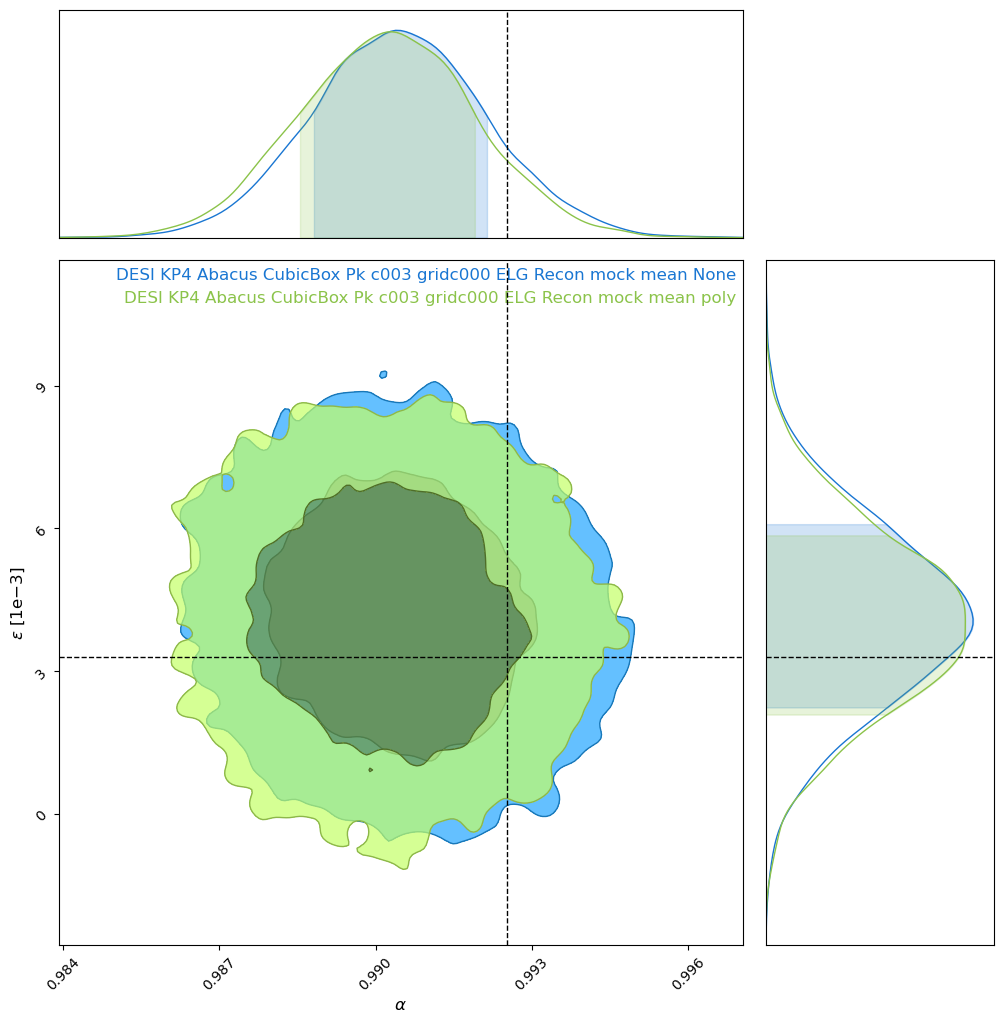

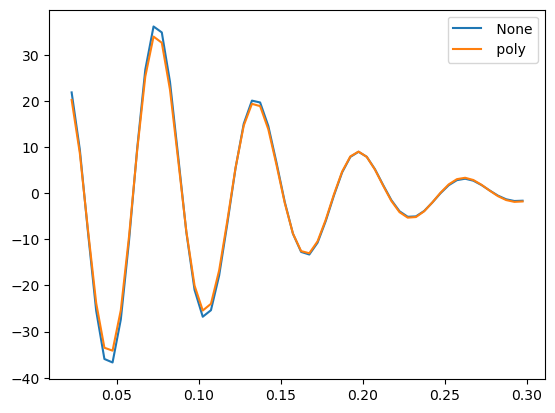

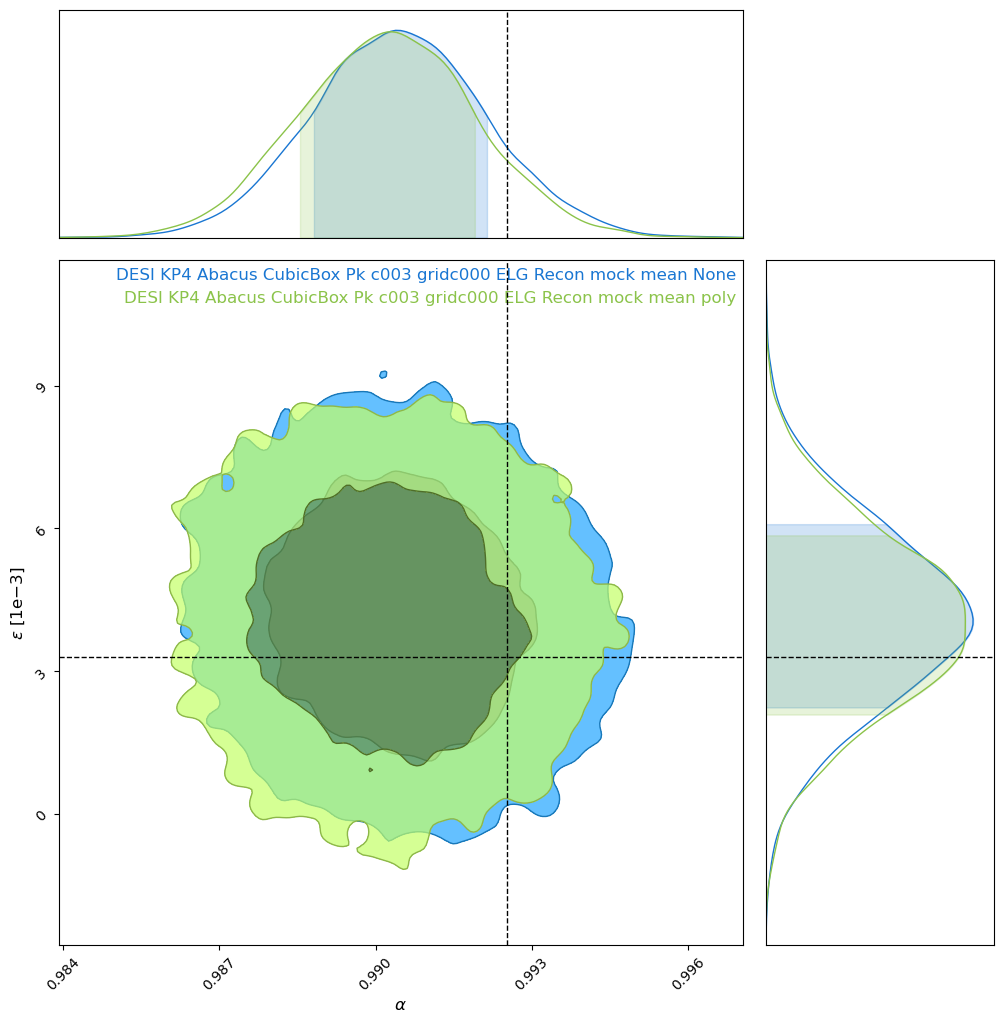

In [6]:
# Import some necessary modules
import os
import sys
import pickle
import logging
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from chainconsumer import ChainConsumer     

sys.path.append("../../Barry/")     # Change this so that it points to where you have Barry installed

#from barry.samplers import DynestySampler
from barry.samplers import NautilusSampler
from barry.config import setup
from barry.models import PowerBeutler2017, CorrBeutler2017
from barry.datasets.dataset_power_spectrum import PowerSpectrum_DESI_KP4
from barry.datasets.dataset_correlation_function import CorrelationFunction_DESI_KP4
from barry.fitter import Fitter
from barry.models.model import Correction # class for applying corrections to the likelihood function 
from barry.utils import weighted_avg_and_cov # function for getting avg and covariance 


pfn1 = "/global/u1/a/abbew25/barryrepo/Barry/cosmodesi_KP4ELG_examplecode_make_picklefiles/plots/desi_kp4_abacus_cubic_ELG-c003/output/desi_kp4_abacus_cubic_ELG-c003.fitter.pkl"

#pfn2 = "/global/u1/a/abbew25/barryrepo/Barry/cosmodesi_KP4ELG_examplecode_make_picklefiles/plots/desi_kp4_abacus_cubic_ELG_phaseshiftfree-splinebroadband/output/desi_kp4_abacus_cubic_ELG_phaseshiftfree-splinebroadband.fitter.pkl"

pfn3 = "/global/u1/a/abbew25/barryrepo/Barry/cosmodesi_KP4ELG_examplecode_make_picklefiles/plots/desi_kp4_abacus_cubic_ELG-c003-broadbandpoly/output/desi_kp4_abacus_cubic_ELG-c003-broadbandpoly.fitter.pkl"

pfns = [
    
        pfn1, 
        #pfn2,
        pfn3
]


c = ChainConsumer() 

# fig, axes = plt.subplots(3, 2, sharex=True, sharey=True)

# ks = np.logspace(-3, 2, 100, base=10)

for i,p in enumerate(pfns): 
    #print(i)
    with open(p, 'rb') as pickle_file:
        fitter = pickle.load(pickle_file)

    count = 0
    for posterior, weight, chain, evidence, model, data, extra in fitter.load():
        
        
        if 'mean' not in extra['name']:  # making sure we only get chain for mock mean 
            continue 
            
        if 'Prerecon' in extra['name']: # making sure we only get results from recon 
            continue  
            
        # if 'CV' in extra['name']:
        #     continue
            
        if 'Xi' in extra['name']:
            continue
                
        df = pd.DataFrame(chain, columns=model.get_labels())
    
        # Compute alpha_par and alpha_perp for each point in the chain
        alpha_par, alpha_perp = model.get_alphas(df["$\\alpha$"].to_numpy(), df["$\\epsilon$"].to_numpy())
        df["$\\alpha_\\parallel$"] = alpha_par
        df["$\\alpha_\\perp$"] = alpha_perp
        
        # Add the chain or MAP to the Chainconsumer plots
        #print(extra)
        extraname = ''
        if i == 0:
            extraname = ' None'
        elif i == 1:
            extraname = ' poly'
#         elif i == 2:
#             extraname = ' poly'
            
        if 'CV' in extra['name']:
            extraname = extraname + ' CV'
            
        extra.pop("realisation", 'mean' + extraname)
        extra["name"] = extra['name'] + extraname
       
        c.add_chain(df, weights=weight, **extra, plot_contour=True, plot_point=False, show_as_1d_prior=False)
        
        model.set_data(data)
        r_s = model.camb.get_data()["r_s"]
        max_post = posterior.argmax()
        params = df.loc[max_post]
        params_dict = model.get_param_dict(chain[max_post])
        for name, val in params_dict.items():
            model.set_default(name, val)

        new_chi_squared, dof, bband, mods, smooths = model.plot(params_dict, display=False)
        k = model.data[0]["ks"]
        # axes[i][count].scatter(k, (model.data[0]['pk0'][0]- smooths[0][0])*k, label= extraname + ' data')
        # axes[i][count].plot(k, (mods[0][0] - smooths[0][0])*k, label=extraname)
        # axes[i][count].legend()
        
        #plt.scatter(k, (model.data[0]['pk0'][0]- smooths[0][0])*k, label= extraname + ' data')
        plt.plot(k, (mods[0][0] - smooths[0][0])*k, label=extraname)
        plt.legend()
        count += 1

        
        # if i == 0:
        #     default = smooths[0][0]
        # # plt.plot(k, (mods[0][0] - smooths[0][0])*k, label=extraname)
        # plt.plot(k, (smooths[0][0]/default)*k, label=extraname)
        
        
        
# plt.subplots_adjust(wspace=0, hspace=0)        
        
        
couplingterm = 1.0/0.22710731766023898
beta_approx = (3.044/(3.044+couplingterm) * (3.7+couplingterm)/3.7) 

alpha, eps = model.get_reverse_alphas(0.99906947, 0.98927880) 

truth = {"$\\alpha$": alpha, "$\\epsilon$": eps, "$\\alpha_\\parallel$": 0.99906947, "$\\alpha_\\perp$": 0.98927880, 
        }#"$\\beta_{\\phi(N_{\\mathrm{eff}})}$": beta_approx}

# alpha, eps = model.get_reverse_alphas(1.02131937, 1.01131066) 

# truth = {"$\\alpha$": alpha, "$\\epsilon$": eps, "$\\alpha_\\parallel$": 1.02131937, "$\\alpha_\\perp$": 1.01131066, 
#         }# "$\\beta_{\\phi(N_{\\mathrm{eff}})}$": 1.0}

parameters = [names for names in truth]

# plt.legend()
# plt.xlabel(r'$k$ $\mathrm{Mpc}^{-1} h$')
# plt.ylabel(r'$k P_0(k)$ $\mathrm{Mpc}^2 h^{-2}$')

c.plotter.plot(
    truth=truth,
        parameters = parameters[:2]+parameters[4:], 
        legend=True,
        display=False,
        figsize=(11, 11), 
)

## plot results with Hinton dewiggling - broadband_type = poly, c000/grid003/template000/003 mocks - power spectrum only 

INFO:barry:Loading chains
INFO:barry:Loaded 52 chains
INFO:barry:Loading chains
INFO:barry:Loaded 52 chains


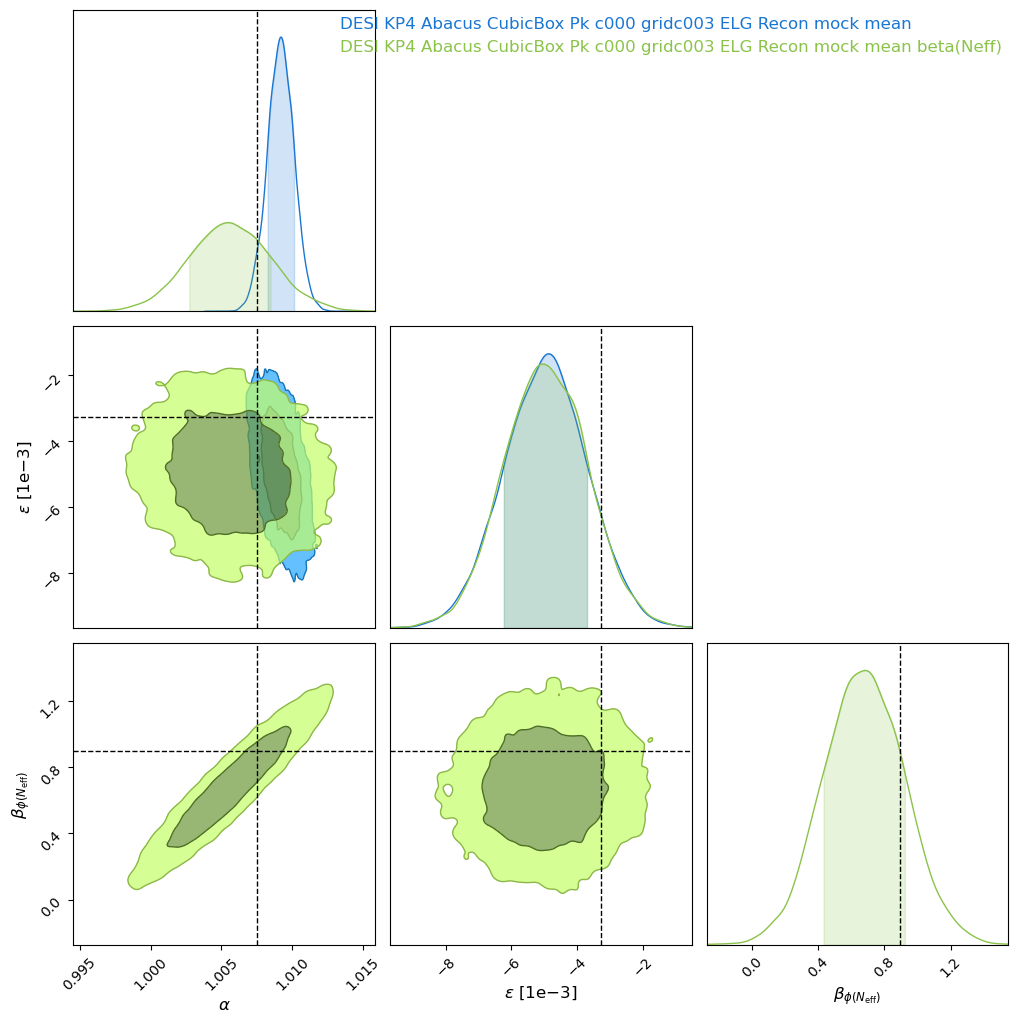

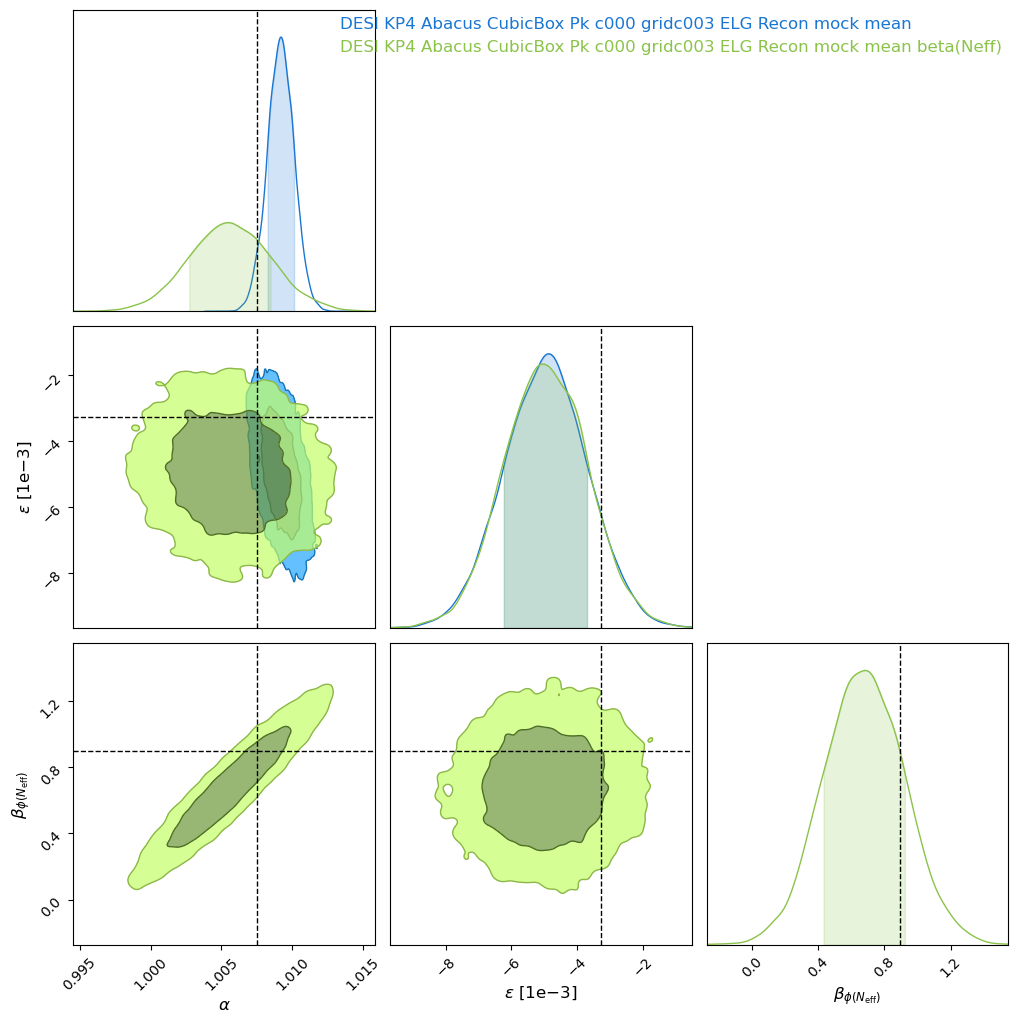

In [5]:
# Import some necessary modules
import os
import sys
import pickle
import logging
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from chainconsumer import ChainConsumer     

sys.path.append("../../Barry/")     # Change this so that it points to where you have Barry installed

#from barry.samplers import DynestySampler
from barry.samplers import NautilusSampler
from barry.config import setup
from barry.models import PowerBeutler2017, CorrBeutler2017
from barry.datasets.dataset_power_spectrum import PowerSpectrum_DESI_KP4
from barry.datasets.dataset_correlation_function import CorrelationFunction_DESI_KP4
from barry.fitter import Fitter
from barry.models.model import Correction # class for applying corrections to the likelihood function 
from barry.utils import weighted_avg_and_cov # function for getting avg and covariance 


pfn1 = "/global/u1/a/abbew25/barryrepo/Barry/cosmodesi_KP4ELG_examplecode_make_picklefiles/plots/desi_kp4_abacus_cubic_ELG-c000_grid003-template000/output/desi_kp4_abacus_cubic_ELG-c000_grid003-template000.fitter.pkl"

pfn2 = "/global/u1/a/abbew25/barryrepo/Barry/cosmodesi_KP4ELG_examplecode_make_picklefiles/plots/desi_kp4_abacus_cubic_ELG-c000_grid003-template000-phaseshift/output/desi_kp4_abacus_cubic_ELG-c000_grid003-template000-phaseshift.fitter.pkl"

pfn3 = "/global/u1/a/abbew25/barryrepo/Barry/cosmodesi_KP4ELG_examplecode_make_picklefiles/plots/desi_kp4_abacus_cubic_ELG-c000_grid003-template003/output/desi_kp4_abacus_cubic_ELG-c000_grid003-template003.fitter.pkl"

pfn4 = "/global/u1/a/abbew25/barryrepo/Barry/cosmodesi_KP4ELG_examplecode_make_picklefiles/plots/desi_kp4_abacus_cubic_ELG-c000_grid003-template003-phaseshift/output/desi_kp4_abacus_cubic_ELG-c000_grid003-template003-phaseshift.fitter.pkl"


pfns = [
    
        # pfn1, 
        # pfn2,
        pfn3,
        pfn4, 
]


c = ChainConsumer() 

# fig, axes = plt.subplots(3, 2, sharex=True, sharey=True)

# ks = np.logspace(-3, 2, 100, base=10)

for i,p in enumerate(pfns): 
    #print(i)
    with open(p, 'rb') as pickle_file:
        fitter = pickle.load(pickle_file)

    count = 0
    for posterior, weight, chain, evidence, model, data, extra in fitter.load():
        
        
        if 'mean' not in extra['name']:  # making sure we only get chain for mock mean 
            continue 
            
        if 'Prerecon' in extra['name']: # making sure we only get results from recon 
            continue  
            
        # if 'CV' in extra['name']:
        #     continue
            
        if 'Xi' in extra['name']:
            continue
                
        df = pd.DataFrame(chain, columns=model.get_labels())
    
        # Compute alpha_par and alpha_perp for each point in the chain
        alpha_par, alpha_perp = model.get_alphas(df["$\\alpha$"].to_numpy(), df["$\\epsilon$"].to_numpy())
        df["$\\alpha_\\parallel$"] = alpha_par
        df["$\\alpha_\\perp$"] = alpha_perp
        
        # Add the chain or MAP to the Chainconsumer plots
        #print(extra)
        extraname = ''
        
        # if i == 0:
        #     extraname = ' None'
        # elif i == 1:
        #     extraname = ' poly'
#         elif i == 2:
#             extraname = ' poly'
            
#         if 'CV' in extra['name']:
#             extraname = extraname + ' CV'
        if i == 1: 
            extraname = ' beta(Neff)'
            
        extra.pop("realisation", 'mean' + extraname)
        extra["name"] = extra['name'] + extraname
       
        c.add_chain(df, weights=weight, **extra, plot_contour=True, plot_point=False, show_as_1d_prior=False)
        
        # model.set_data(data)
        # r_s = model.camb.get_data()["r_s"]
        # max_post = posterior.argmax()
        # params = df.loc[max_post]
        # params_dict = model.get_param_dict(chain[max_post])
        # for name, val in params_dict.items():
        #     model.set_default(name, val)

        # new_chi_squared, dof, bband, mods, smooths = model.plot(params_dict, display=False)
        # k = model.data[0]["ks"]
        # axes[i][count].scatter(k, (model.data[0]['pk0'][0]- smooths[0][0])*k, label= extraname + ' data')
        # axes[i][count].plot(k, (mods[0][0] - smooths[0][0])*k, label=extraname)
        # axes[i][count].legend()
        
        #plt.scatter(k, (model.data[0]['pk0'][0]- smooths[0][0])*k, label= extraname + ' data')
        # plt.plot(k, (mods[0][0] - smooths[0][0])*k, label=extraname)
        # plt.legend()
        # count += 1

        
        # if i == 0:
        #     default = smooths[0][0]
        # # plt.plot(k, (mods[0][0] - smooths[0][0])*k, label=extraname)
        # plt.plot(k, (smooths[0][0]/default)*k, label=extraname)
        
        
    
# alpha_para, alpha_perp, beta = 0.97912566, 0.98881584, 1.0

alpha_para, alpha_perp = 1.00093140, 1.01083738
couplingterm = 1.0/0.22710731766023898
beta = (3.044/(3.044+couplingterm)) / (3.7/(3.7+couplingterm))  

alpha, eps = model.get_reverse_alphas(alpha_para, alpha_perp)
   
truth = {"$\\alpha$": alpha, "$\\epsilon$": eps, "$\\alpha_\\parallel$": alpha_para, "$\\alpha_\\perp$": alpha_perp, 
        "$\\beta_{\\phi(N_{\\mathrm{eff}})}$": beta}

parameters = [names for names in truth]

# plt.legend()
# plt.xlabel(r'$k$ $\mathrm{Mpc}^{-1} h$')
# plt.ylabel(r'$k P_0(k)$ $\mathrm{Mpc}^2 h^{-2}$')

c.plotter.plot(
    truth=truth,
        parameters = parameters[:2]+parameters[4:], 
        legend=True,
        display=False,
        figsize=(11, 11), 
)

# some initial results with secondgen mocks

INFO:barry:Loading chains
INFO:barry:Loaded 52 chains
INFO:barry:Loading chains
INFO:barry:Loaded 52 chains


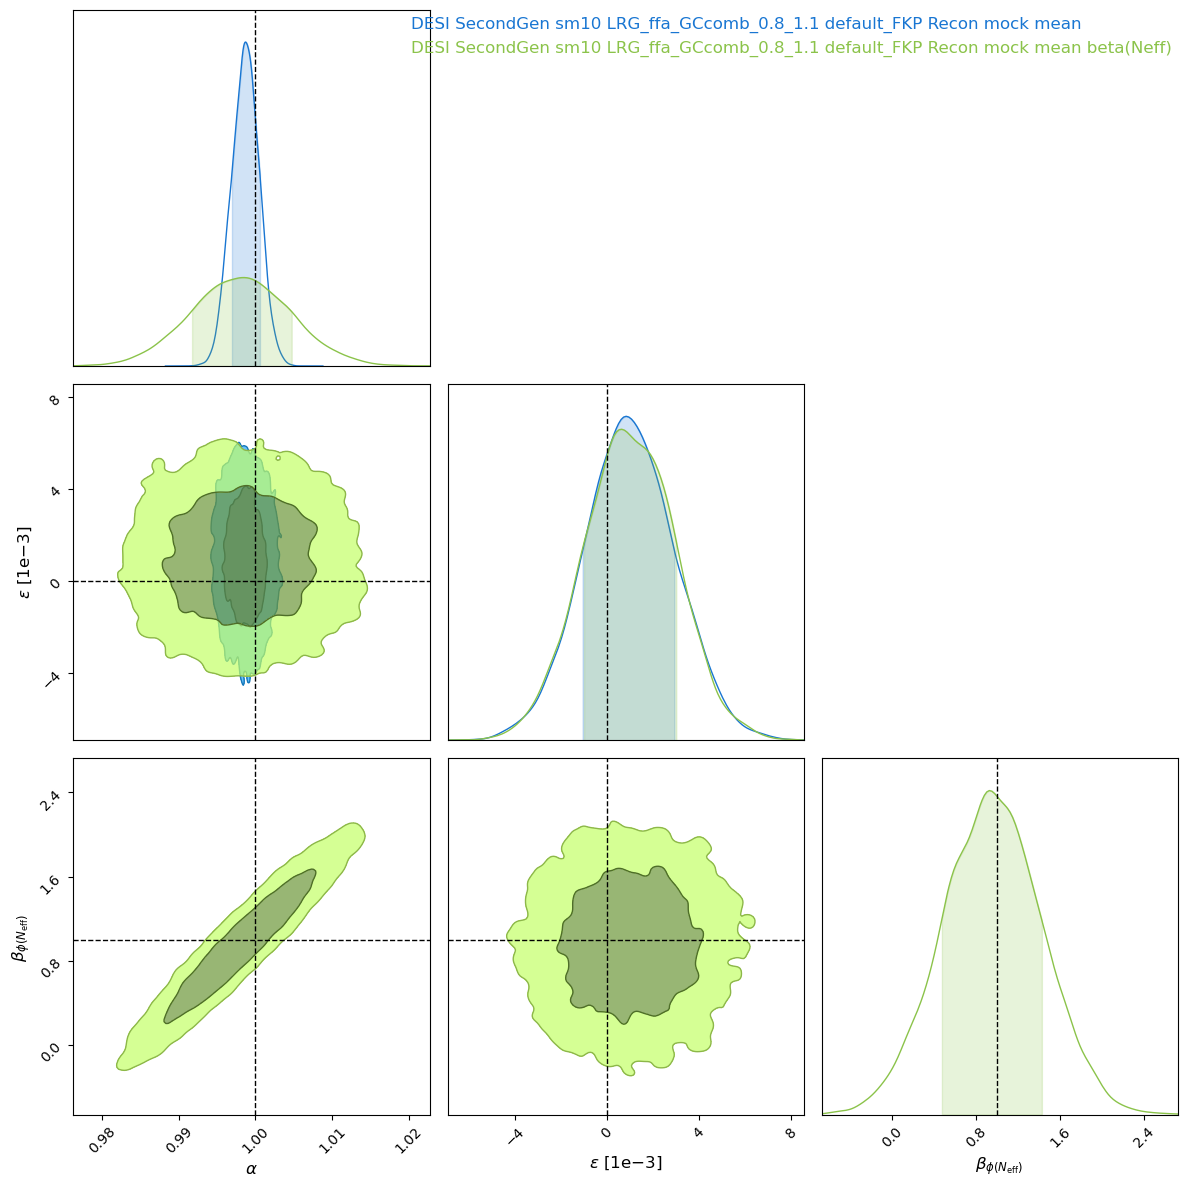

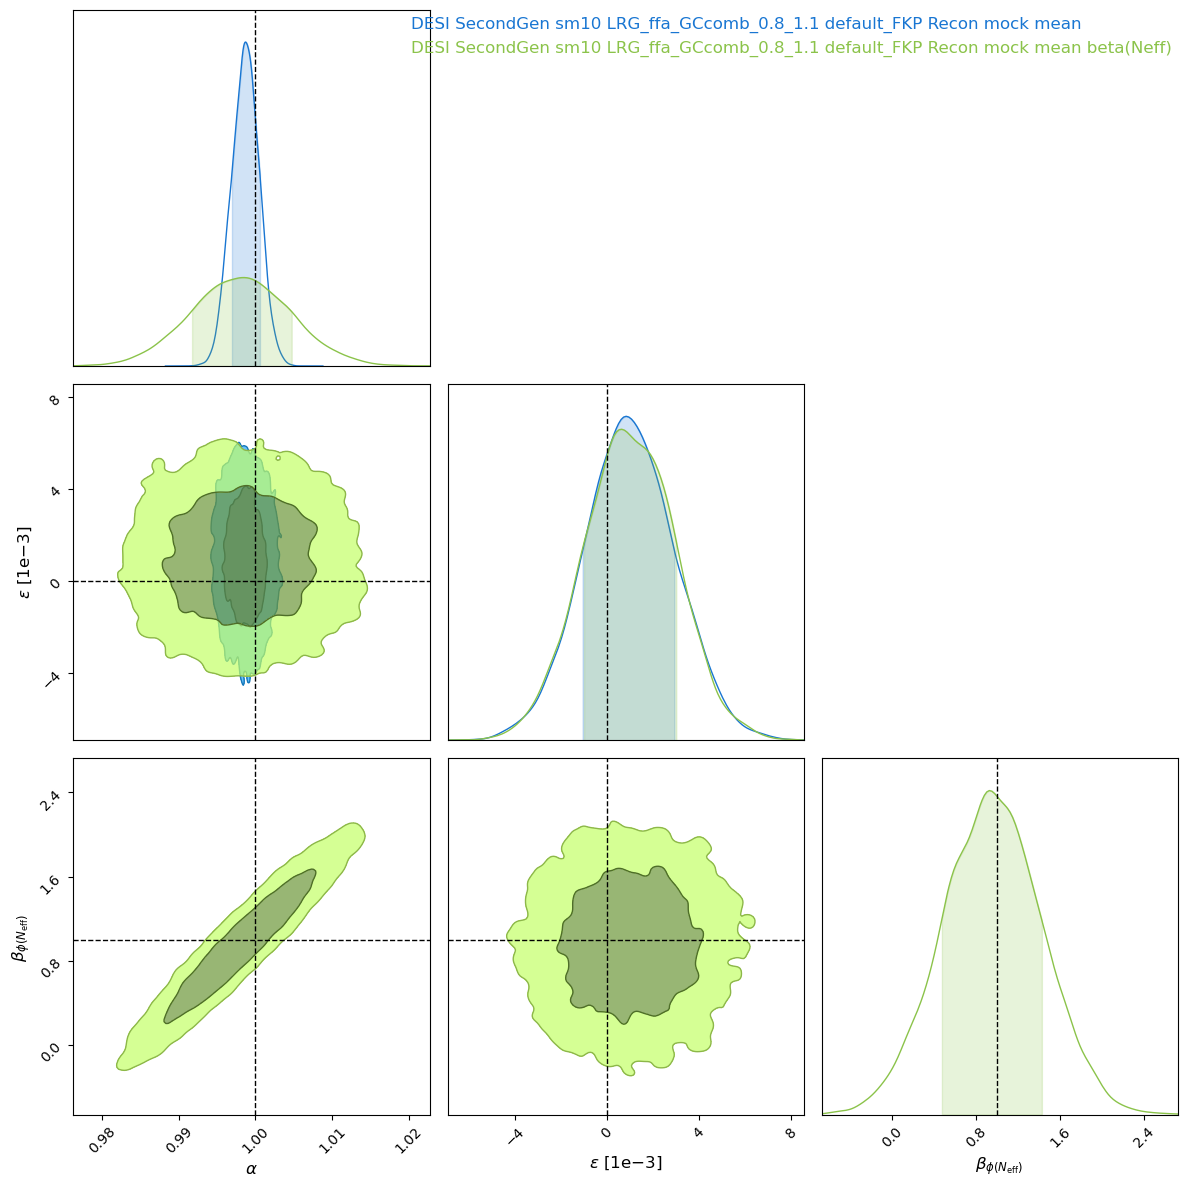

In [6]:
# Import some necessary modules
import os
import sys
import pickle
import logging
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from chainconsumer import ChainConsumer     

sys.path.append("../../Barry/")     # Change this so that it points to where you have Barry installed

#from barry.samplers import DynestySampler
from barry.samplers import NautilusSampler
from barry.config import setup
from barry.models import PowerBeutler2017, CorrBeutler2017
from barry.datasets.dataset_power_spectrum import PowerSpectrum_DESI_KP4
from barry.datasets.dataset_correlation_function import CorrelationFunction_DESI_KP4
from barry.fitter import Fitter
from barry.models.model import Correction # class for applying corrections to the likelihood function 
from barry.utils import weighted_avg_and_cov # function for getting avg and covariance 


path_p1 = '/global/u1/a/abbew25/barryrepo/Barry/cosmodesi_KP4ELG_examplecode_make_picklefiles/plots/'

# ELGs z = 0.8 - 1.1 
pfn1 = path_p1 + "desi_kp4_abacus_cubic_ELG-secondgenmocks/output/desi_kp4_abacus_cubic_ELG-secondgenmocks.fitter.pkl"
pfn2 = path_p1 + "desi_kp4_abacus_cubic_ELG-secondgenmocks-phaseshift/output/desi_kp4_abacus_cubic_ELG-secondgenmocks-phaseshift.fitter.pkl"

# ELGs z = 1.1 - 1.6 
pfn3 = path_p1 + "desi_kp4_abacus_cubic_ELG-secondgenmocks-z11-16/output/desi_kp4_abacus_cubic_ELG-secondgenmocks-z11-16.fitter.pkl"
pfn4 = path_p1 + "desi_kp4_abacus_cubic_ELG-secondgenmocks-phaseshift-z11-16/output/desi_kp4_abacus_cubic_ELG-secondgenmocks-phaseshift-z11-16.fitter.pkl"

# LRGs z = 0.4 - 0.6 
pfn5 = path_p1 + "desi_kp4_abacus_cubic_LRG-secondgenmocks-z04-06/output/desi_kp4_abacus_cubic_LRG-secondgenmocks-z04-06.fitter.pkl"
pfn6 = path_p1 + "desi_kp4_abacus_cubic_LRG-secondgenmocks-phaseshift-z04-06/output/desi_kp4_abacus_cubic_LRG-secondgenmocks-phaseshift-z04-06.fitter.pkl"

# LRGs z = 0.6 - 0.8 
pfn7 = path_p1 + "desi_kp4_abacus_cubic_LRG-secondgenmocks-z06-08/output/desi_kp4_abacus_cubic_LRG-secondgenmocks-z06-08.fitter.pkl"
pfn8 = path_p1 + "desi_kp4_abacus_cubic_LRG-secondgenmocks-phaseshift-z06-08/output/desi_kp4_abacus_cubic_LRG-secondgenmocks-phaseshift-z06-08.fitter.pkl"

# LRGs z = 0.8 - 1.1 
pfn9 = path_p1 + "desi_kp4_abacus_cubic_LRG-secondgenmocks-z08-11/output/desi_kp4_abacus_cubic_LRG-secondgenmocks-z08-11.fitter.pkl"
pfn10 = path_p1 + "desi_kp4_abacus_cubic_LRG-secondgenmocks-phaseshift-z08-11/output/desi_kp4_abacus_cubic_LRG-secondgenmocks-phaseshift-z08-11.fitter.pkl"

# QSOs z = 0.8 - 2.1 
pfn11 = path_p1 + "desi_kp4_abacus_cubic_QSO-secondgenmocks-z08-21/output/desi_kp4_abacus_cubic_QSO-secondgenmocks-z08-21.fitter.pkl"
pfn12 = path_p1 + "desi_kp4_abacus_cubic_QSO-secondgenmocks-phaseshift-z08-21/output/desi_kp4_abacus_cubic_QSO-secondgenmocks-phaseshift-z08-21.fitter.pkl"

# names = ['ELG z = 0.8 - 1.1', 'ELG z = 1.1 - 1.6', 'LRG z = 0.4 - 0.6', 
 #         'LRG z = 0.6 - 0.8', 'LRG z = 0.8 - 1.1', 'QSO z = 0.8 - 2.1']

pfns = [
    
        # pfn1, 
         # pfn2,
        # pfn3,
        # pfn4,
        # pfn5, 
        # pfn6,
        # pfn7, 
        #  pfn8,
        # pfn9, 
        # pfn10,
        pfn11, 
        pfn12,
    
]


c = ChainConsumer() 

for i,p in enumerate(pfns): 
    #print(i)
    with open(p, 'rb') as pickle_file:
        fitter = pickle.load(pickle_file)

    count = 0
    for posterior, weight, chain, evidence, model, data, extra in fitter.load():
        
        
        if 'mean' not in extra['name']:  # making sure we only get chain for mock mean 
            continue 
            
        if 'Prerecon' in extra['name']: # making sure we only get results from recon 
            continue  
                
        df = pd.DataFrame(chain, columns=model.get_labels())
    
        # Compute alpha_par and alpha_perp for each point in the chain
        alpha_par, alpha_perp = model.get_alphas(df["$\\alpha$"].to_numpy(), df["$\\epsilon$"].to_numpy())
        df["$\\alpha_\\parallel$"] = alpha_par
        df["$\\alpha_\\perp$"] = alpha_perp
        
        # Add the chain or MAP to the Chainconsumer plots
        #print(extra)
        extraname = ''

        if i%2 == 1: 
            extraname = ' beta(Neff)'
            
        extra.pop("realisation", 'mean' + extraname)
        # extra["name"] = names[i] + extraname
        extra["name"] = extra['name'] + extraname
        
       
        c.add_chain(df, weights=weight, **extra, plot_contour=True, plot_point=False, show_as_1d_prior=False)
        
        # model.set_data(data)
        # r_s = model.camb.get_data()["r_s"]
        # max_post = posterior.argmax()
        # params = df.loc[max_post]
        # params_dict = model.get_param_dict(chain[max_post])
        # for name, val in params_dict.items():
        #     model.set_default(name, val)

        # new_chi_squared, dof, bband, mods, smooths = model.plot(params_dict, display=False)
        # k = model.data[0]["ks"]
        # axes[i][count].scatter(k, (model.data[0]['pk0'][0]- smooths[0][0])*k, label= extraname + ' data')
        # axes[i][count].plot(k, (mods[0][0] - smooths[0][0])*k, label=extraname)
        # axes[i][count].legend()
        
        #plt.scatter(k, (model.data[0]['pk0'][0]- smooths[0][0])*k, label= extraname + ' data')
        # plt.plot(k, (mods[0][0] - smooths[0][0])*k, label=extraname)
        # plt.legend()
        # count += 1

        
        # if i == 0:
        #     default = smooths[0][0]
        # # plt.plot(k, (mods[0][0] - smooths[0][0])*k, label=extraname)
        # plt.plot(k, (smooths[0][0]/default)*k, label=extraname)
        
        
    
# alpha_para, alpha_perp, beta = 0.97912566, 0.98881584, 1.0

alpha_para, alpha_perp = 1.0, 1.0 # 1.00093140, 1.01083738
#couplingterm = 1.0/0.22710731766023898
#beta = (3.044/(3.044+couplingterm)) / (3.7/(3.7+couplingterm))  
beta = 1.0

alpha, eps = 1.0, 0.0 #model.get_reverse_alphas(alpha_para, alpha_perp)
   
truth = {"$\\alpha$": alpha, "$\\epsilon$": eps, "$\\alpha_\\parallel$": alpha_para, "$\\alpha_\\perp$": alpha_perp, 
        "$\\beta_{\\phi(N_{\\mathrm{eff}})}$": beta}

parameters = [names for names in truth]

# plt.legend()
# plt.xlabel(r'$k$ $\mathrm{Mpc}^{-1} h$')
# plt.ylabel(r'$k P_0(k)$ $\mathrm{Mpc}^2 h^{-2}$')

c.plotter.plot(
    truth=truth,
        parameters = parameters[:2]+parameters[4:], 
        legend=True,
        display=False,
        figsize=(13, 13), 
)

# We want to compare the value of the fitted alpha for some results in which beta is and isn't free 

/tmp/ipykernel_1317405/2402125150.py:10: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  dat_anisotropic_pk_recon = pd.read_csv(filepath_ELG_anisotropic_pk_recon, skiprows=0, nrows=6, index_col=False)


<Figure size 1600x700 with 0 Axes>

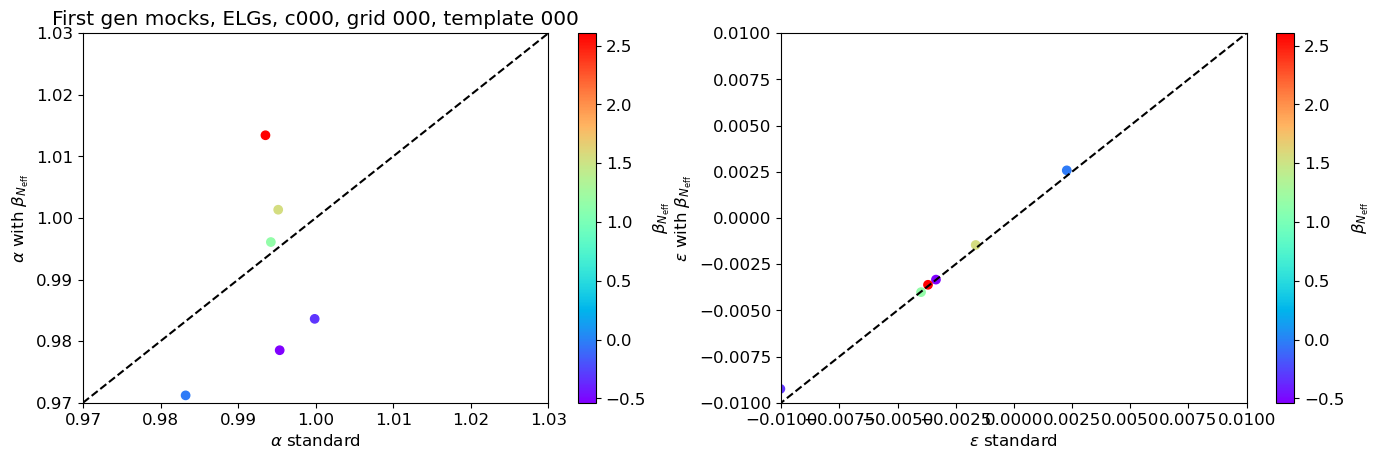

In [157]:
# Import some necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

filepath_ELG_anisotropic_pk_recon = "/global/u1/a/abbew25/barryrepo/Barry/cosmodesi_KP4ELG_examplecode_make_picklefiles/plots/desi_kp4_abacus_cubic_ELG-c003-broadbandpoly/output/Barry_fit_Pk_Recon.txt"
filepath_ELG_anisotropic_with_betaneff_pk_recon = "/global/u1/a/abbew25/barryrepo/Barry/cosmodesi_KP4ELG_examplecode_make_picklefiles/plots/desi_kp4_abacus_cubic_ELG_phaseshiftfree-c003-broadbandpoly/output/Barry_fit_Pk_Recon.txt" 

dat_anisotropic_pk_recon = pd.read_csv(filepath_ELG_anisotropic_pk_recon, skiprows=0, nrows=6, index_col=False)
dat_anisotropic_beta_pk_recon = pd.read_csv(filepath_ELG_anisotropic_with_betaneff_pk_recon, skiprows=0, nrows=6, index_col=False)
dat_anisotropic_pk_recon.columns = [i.strip() for i in dat_anisotropic_pk_recon.columns]
dat_anisotropic_beta_pk_recon.columns = [i.strip() for i in dat_anisotropic_beta_pk_recon.columns]

cm = matplotlib.colormaps['rainbow']
colors = dat_anisotropic_beta_pk_recon['beta'].to_numpy()
norm = mpl.colors.Normalize(vmin=np.min(colors), vmax=np.max(colors))

# add alpha, epsilon as additional rows to the models 
dat_anisotropic_pk_recon['alpha'] = dat_anisotropic_pk_recon['alpha_perp']**(1.0/3.0) * dat_anisotropic_pk_recon['alpha_par']**(2.0/3.0)
dat_anisotropic_pk_recon['epsilon'] = (dat_anisotropic_pk_recon['alpha_perp']/dat_anisotropic_pk_recon['alpha_par'])**(1.0/3.0) - 1.0
dat_anisotropic_beta_pk_recon['alpha'] = dat_anisotropic_beta_pk_recon['alpha_perp']**(1.0/3.0) * dat_anisotropic_beta_pk_recon['alpha_par']**(2.0/3.0)
dat_anisotropic_beta_pk_recon['epsilon'] = (dat_anisotropic_beta_pk_recon['alpha_perp']/dat_anisotropic_beta_pk_recon['alpha_par'])**(1.0/3.0) - 1.0

# plot the values against each other 
plt.figure(figsize=(16,7))
f, (ax1, ax2) = plt.subplots(1,2)

axes = [ax1, ax2] 

plt.rcParams['font.size'] = 12

ax1.plot([0.97, 1.03],[0.97, 1.03], linestyle='--', color='k')
ax1.scatter(dat_anisotropic_pk_recon['alpha'], dat_anisotropic_beta_pk_recon['alpha'], c=colors, cmap=cm)
ax1.set_xlabel(r"$\alpha$ standard")
ax1.set_ylabel(r"$\alpha$ with $\beta_{N_{\mathrm{eff}}}$")
ax1.set_title('First gen mocks, ELGs, c000, grid 000, template 000')
#ax1.set_xlim([0.97, 1.03])
#ax1.set_ylim([0.97, 1.03])

# plot the values against each other 
ax2.plot([-0.015, 0.015],[-0.015, 0.015], linestyle='--', color='k')
ax2.scatter(dat_anisotropic_pk_recon['epsilon'], dat_anisotropic_beta_pk_recon['epsilon'], c=colors, cmap=cm)
ax2.set_xlabel(r"$\epsilon$ standard")
ax2.set_ylabel(r"$\epsilon$ with $\beta_{N_{\mathrm{eff}}}$")
#plt.xlim([-0.01, 0.01])
#plt.ylim([-0.01, 0.01])
sm = plt.cm.ScalarMappable(cmap=cm, norm=norm)
#plt.colorbar(sm)
plt.colorbar(sm, label=r'$\beta_{N_{\mathrm{eff}}}$',ax=ax2)#, norm=norm)
plt.colorbar(sm, label=r'$\beta_{N_{\mathrm{eff}}}$',ax=ax1)#, norm=norm)

#sm.set_array([])
plt.subplots_adjust(left=0, right=2)
plt.show()

